In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

import gc # Free up memory

In [2]:


zone_data_6 = pd.read_csv('MACHINE_LEARNING_PART/zone_data_6_clustered.csv')
zone_data_6 = zone_data_6[zone_data_6['Cluster'] == 0]



In [3]:
def default_kwargs():
    return {'enforce_stationarity': False, 'order':(10, 2, 10)}

def build_arma_model(data, kwargs=None, model_func=ARIMA):
    if kwargs is None:
        kwargs = default_kwargs()
    # ARMA model is a special case of ARIMA with no differencing (d=0)
    model = model_func(data, **kwargs)
    fitted_model = model.fit()
    return fitted_model

def forecast_and_simulate(model, steps=1000):
    # Get the forecast result
    forecast_result = model.get_forecast(steps=steps)
    forecast_mean = forecast_result.predicted_mean

    # Convert MultiIndex DataFrame to standard column format
    conf_intervals = forecast_result.conf_int()
    conf_intervals.columns = ['lower', 'upper']

    return forecast_mean, conf_intervals

def run_arma(train_data, test_data,  predictive_col='Price Per ML ($)', kwargs=None, model_func=ARIMA):
    
    # Run ARIMA model and get output
    arma_model = build_arma_model(train_data.reset_index()[predictive_col], kwargs=kwargs, model_func=model_func)
    forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))
    
    # Store output in dataframe
    df = pd.concat([pd.DataFrame(np.zeros((train_data.shape[0], 2)), columns=conf_df.columns), conf_df])
    df = df.assign(value=pd.concat([train_data.reset_index()[predictive_col], forecast_series]), start=len(train_data))
    
    return df

def stochastic_forecast(model, steps=1000):
    
    forecast_result = model.get_forecast(steps=steps)

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [486]:
zone_data

Price Per ML ($)  Volume Traded (ML)
Create_date                                      
2009-04-30             2200.0               544.0
2009-05-31             2200.0              1214.1
2009-06-30             2100.0              1413.0
2009-07-31             2200.0             11562.2
2009-08-31             2000.0              1865.3
...                       ...                 ...
2023-11-30             4630.0               526.7
2023-12-31             4600.0               607.6
2024-01-31             4600.0                81.1
2024-02-29             4440.0                39.4
2024-03-31             4585.0               279.0

[180 rows x 2 columns]

In [500]:
mod.simulate(10, repetitions=50, anchor='end').mean(axis=1)

2011-10-31    1619.611914
2011-11-30    1613.011590
2011-12-31    1708.411735
2012-01-31    1669.874642
2012-02-29    1878.891828
2012-03-31    1896.780151
2012-04-30    2034.839900
2012-05-31    2141.112206
2012-06-30    2288.149847
2012-07-31    2343.378387
Freq: ME, dtype: float64

In [526]:
start = 100

train = zone_data.iloc[:start, :]["Price Per ML ($)"]
test = zone_data.iloc[start:, :]["Price Per ML ($)"]
mod = build_arma_model(train)

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [535]:
sims

Price Per ML ($)                                         \
                        0            1            2            3     
2017-08-31      2465.824392  2646.876772  2370.217345  2443.541687   
2017-09-30      2496.575246  2415.998747  2829.078465  2383.983829   
2017-10-31      2628.776938  2685.910983  2905.948488  2514.799381   
2017-11-30      2280.742961  3006.250549  2968.447152  2384.317883   
2017-12-31      2553.445380  2935.582494  3236.461806  2490.605096   
...                     ...          ...          ...          ...   
2023-11-30      2928.477263  6143.260277  3350.982513   299.125923   
2023-12-31      3220.376988  6252.089548  3169.645633   208.336358   
2024-01-31      3305.967325  6497.196399  3047.302407   192.517782   
2024-02-29      3351.660230  6396.385298  2753.470351    80.354884   
2024-03-31      3227.779296  6263.727429  2995.539199   215.228599   

                                                                             \
                    4            5            6            7            8     
2017-08-31  2587.435711  2106.536590  2349.524612  2430.083464  2614.769678   
2017-09-30  2619.073378  2316.913705  2317.396619  2380.655902  2320.763863   
2017-10-31  2730.136332  2458.612439  2634.316492  2555.023548  2462.971983   
2017-11-30  2688.324116  2803.866058  2765.006029  2482.567179  2463.266708   
2017-12-31  2713.833105  2681.398160  2698.781295  2564.294091  2557.071916   
...                 ...          ...          ...          ...          ...   
2023-11-30  2162.225010  4146.489165  3362.502861   223.321033  5218.012414   
2023-12-31  2332.458552  4562.388652  3014.503732   543.257822  5224.869806   
2024-01-31  2376.881878  4694.615904  3147.100886   486.309040  4996.743510   
2024-02-29  2338.850258  4771.218617  3042.622335   508.354598  5251.399467   
2024-03-31  2232.521476  4798.831225  3120.024286   318.934153  5048.337996   

                         ...                                         \
                    9    ...          490          491          492   
2017-08-31  2569.672255  ...  2627.894714  2588.769692  2428.828453   
2017-09-30  3009.656576  ...  2483.399259  2699.013658  2728.766974   
2017-10-31  3080.013083  ...  2328.395486  2846.434241  2580.780673   
2017-11-30  2901.563098  ...  2245.679978  2710.685439  2541.716646   
2017-12-31  2793.458027  ...  2539.526148  3015.297369  2713.317002   
...                 ...  ...          ...          ...          ...   
2023-11-30  3161.656068  ...   891.969688  6989.402125  5330.657427   
2023-12-31  2858.114831  ...   607.351267  6812.730700  5014.807439   
2024-01-31  3059.155193  ...   650.723703  6896.375900  5003.706083   
2024-02-29  3127.395173  ...  1030.457757  7140.554209  5187.148580   
2024-03-31  2983.819697  ...   954.526827  7448.277235  5136.071540   

                                                                             \
                    493          494          495          496          497   
2017-08-31  2574.579381  2919.837420  2732.496589  2621.263850  2536.577498   
2017-09-30  2935.465733  3024.870481  2869.402859  2855.829506  2826.390475   
2017-10-31  2935.408759  2684.027588  2587.491764  2858.981521  2885.234206   
2017-11-30  2956.542491  2833.732551  2750.783283  3008.717841  2940.545815   
2017-12-31  3104.190486  2895.397458  2524.873651  2818.989375  3405.967397   
...                 ...          ...          ...          ...          ...   
2023-11-30  5158.987078  4993.897640  1563.609146  2734.792879  5864.042213   
2023-12-31  4975.777067  5339.823452  1617.619218  2711.295751  5946.816822   
2024-01-31  4802.210051  5490.871782  1665.040557  2847.807792  6190.907311   
2024-02-29  4803.421766  5387.241829  1827.989517  2610.044746  6266.144455   
2024-03-31  4754.363523  5334.203704  1783.418928  2426.134095  6534.416926   

                                      
                    498          499  
2017-08-31  2759.294735  2610.935808  
201

In [544]:
sims.columns

MultiIndex([('Price Per ML ($)',   0),
            ('Price Per ML ($)',   1),
            ('Price Per ML ($)',   2),
            ('Price Per ML ($)',   3),
            ('Price Per ML ($)',   4),
            ('Price Per ML ($)',   5),
            ('Price Per ML ($)',   6),
            ('Price Per ML ($)',   7),
            ('Price Per ML ($)',   8),
            ('Price Per ML ($)',   9),
            ...
            ('Price Per ML ($)', 490),
            ('Price Per ML ($)', 491),
            ('Price Per ML ($)', 492),
            ('Price Per ML ($)', 493),
            ('Price Per ML ($)', 494),
            ('Price Per ML ($)', 495),
            ('Price Per ML ($)', 496),
            ('Price Per ML ($)', 497),
            ('Price Per ML ($)', 498),
            ('Price Per ML ($)', 499)],
           length=500)

<AxesSubplot: xlabel='Create_date'>

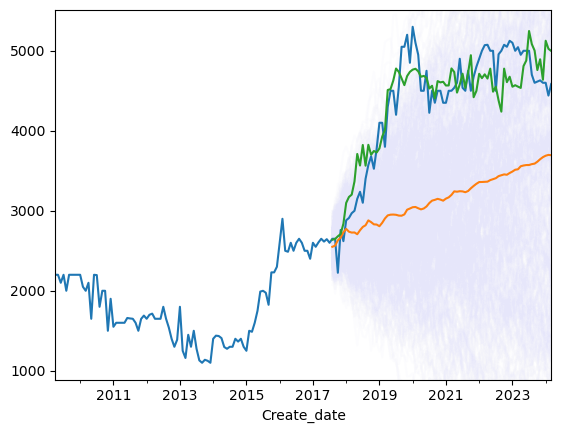

In [545]:
fig, ax = plt.subplots()

zone_data["Price Per ML ($)"].plot(ax=ax)

sims = mod.simulate(len(test), repetitions=500, anchor='end')
sims.mean(axis=1).plot(ax=ax)
yl = plt.gca().get_ylim()
sims.plot(c='lavender', alpha=0.1, legend=False, ax=ax, zorder=0)
plt.gca().set_ylim(yl)

error = (sims.T - test.values).T

closest = abs(error).mean().argmin()
sims[sims.columns[closest]].plot()

In [4]:
# Create a monthly aggregate
zone_data = zone_data_6
zone_data.Create_date = pd.to_datetime(zone_data.Create_date)
grouped = zone_data.groupby(pd.Grouper(key="Create_date", freq='M'))
# Take the median of the monthly price
zone_data = grouped[["Price Per ML ($)", "Volume Traded (ML)"]].median().fillna(0)
# Take the sum of the monthly volume traded
zone_data["Volume Traded (ML)"] =grouped["Volume Traded (ML)"].sum().fillna(0)

C:\Users\Meredith\AppData\Local\Temp\ipykernel_11324\357239755.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = zone_data.groupby(pd.Grouper(key="Create_date", freq='M'))


In [446]:
def make_dataset(zone_data, col, output_name, kwargs=None, model_func=ARIMA,  clean_up=True, start_base=10, stop_val=None, exog_cols=None):
    dfs = []
    if stop_val is None:
        stop_val = len(zone_data)

    if kwargs is None:
        kwargs = default_kwargs()


    # Run arma for different starting times to use in optimisation (could call every time an evaluation is needed but this saves computation)
    for start in np.arange(int(start_base), np.minimum(stop_val, len(zone_data))):
        train_data = zone_data.iloc[:start, :]
        test_data = zone_data.iloc[start:, :]

        if exog_cols is not None:
            if kwargs is None:
                kwargs = default_kwargs()
            kwargs = kwargs.update({'exog':train_data.reset_index()[exog_cols]})
        dfs.append(run_arma(train_data, test_data, predictive_col=col, kwargs=kwargs, model_func=model_func))
        
    pd.concat(dfs).to_csv(f'{output_name}.csv')

    if clean_up:
        # Delete the probably sizeable dataframe generated to free up memory
        del dfs
        gc.collect()

def get_predictions(df, t, start):
    # Previously returned as np array, changed to series for compatability with filtered datasets
    try:
        return df.loc[df.start==start, :].loc[t, 'value'].clip(lower=0, upper=10**6)
    except:
        return df.loc[(df.start==start)&np.in1d(df.index, t), 'value'].clip(lower=0, upper=10**6)
        
        
def plot_dataset(df, ax):
    # Set up for consistent colour mapping
    norm = mpl.colors.Normalize(vmin=min(df.start.unique()), vmax=max(df.start.unique()))
    map = cm.ScalarMappable(norm=norm, cmap='viridis')

    t = df.index.unique()
    
    # Plotting the data for different starts
    for start in df.start.unique():
        pred = get_predictions(df, t, start)
       # ax.plot(t, get_predictions(df, t, start), c=map.get_cmap()(norm(start)))
        ax.plot(pred.index, pred, c=map.get_cmap()(norm(start)))
    # Formatting plot
    plt.colorbar(map,ax=ax, label="Testing Period Start")
    
    ax.set_ylim(0, max(get_predictions(df, t, max(df.start))))

def plot_residuals(df, ax, group_size=None, comparison_ax=None, label=None):
    # Set up for consistent colour mapping
    norm = mpl.colors.Normalize(vmin=min(df.start.unique()), vmax=max(df.start.unique()))
    map = cm.ScalarMappable(norm=norm, cmap='viridis')

    t = df.start.unique()

    if group_size is None: # used to be 15
        group_size = int(len(t)/12)

    df["Observed"] = df.index
    df["Observed"] = df["Observed"].map(df.loc[df.start==df.start.max(), 'value'])

    df = df.assign(offset=df.index-df.start, offset_group=(np.floor((df.index-df.start)/group_size)*group_size).astype(int),error=abs(df.value.clip(lower=0, upper=10**6)-df.Observed))

    df.loc[df.index<df.start, 'error'] = np.nan
    df.loc[df.index<df.start, 'offset_group'] = np.nan

    

    for start in df.start.unique():
        t_in  = t[t>=start]
       # ax.plot(t_in-start, get_predictions(df, t_in, start) - get_predictions(df, t_in, df.start.max()), c=map.get_cmap()(norm(start)), alpha=0.1)

    pos = df.groupby('offset_group').offset.min() + group_size/2
    df.boxplot(column='error', by='offset_group', ax=ax, showfliers=False, grid=False, positions=pos, widths=0.8*group_size)

    mse = np.sqrt((df.error**2).mean())
    ax.axhline(mse, ls='--', c='k')

    ax.title.set_text(f"{label}, MSE = {mse:,.1f}")

    ax.set_xticks(ticks = pos, 
                  labels=[f"{min_:.0f}-{max_:.0f}" for min_, max_ in zip(df.groupby('offset_group').offset.min(), df.groupby('offset_group').offset.max())],
                  rotation=20,
                  ha='right')

    ax.set_xlabel("Steps from start")
    ax.set_ylabel("Error")

    ax.set_yscale('log')

    a = [ax]
    if comparison_ax:
        comparison_ax.plot(df.groupby('offset').offset.median(), df.groupby('offset').error.median(), label=label)
        comparison_ax.fill_between(df.groupby('offset').offset.median(), 
                                   df.groupby('offset').error.quantile(0.25), df.groupby('offset').error.quantile(0.75),
                                   alpha = 0.1)
        a.append(comparison_ax)

    for ax_ in a:
        ax_.set_xlabel("Steps from start")
        ax_.set_ylabel("Error")

        ax_.set_yscale('log')
    #plt.colorbar(map,ax=ax, label="Testing Period Start")


(0.0, 10000000.0)

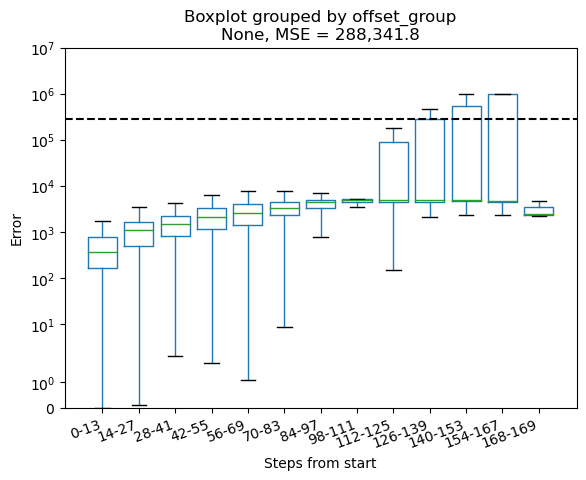

In [447]:
plot_residuals(df2, plt.gca())

plt.yscale('symlog')

plt.ylim(0, 10000000)

In [445]:
df.start.value_counts()/15

start
10     11.2
118    11.2
111    11.2
112    11.2
113    11.2
       ... 
63     11.2
64     11.2
65     11.2
66     11.2
167    11.2
Name: count, Length: 158, dtype: float64

In [182]:
def read_and_plot(dataset_name, ax=None, resid_ax=None, comparison_ax=None, label=None):
    df = pd.read_csv(dataset_name, index_col=0)
    print(df.shape)

    if ax is not None:
        plot_dataset(df, ax)
    if resid_ax is not None:
        plot_residuals(df, resid_ax, comparison_ax=comparison_ax, label=label)


In [7]:
arma_price = "ARMA Price"
make_dataset(zone_data, "Price Per ML ($)", arma_price)

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\

In [469]:
arma_price = "ARMA Price 2"
make_dataset(zone_data, "Price Per ML ($)", arma_price, kwargs={'order':(20, 2, 10), 'enforce_stationarity': False})

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\

In [ ]:
for start in starts:
    model

In [8]:
exo_data = pd.read_pickle('MACHINE_LEARNING_PART/exo_data.pkl')

new_data = pd.merge(exo_data, zone_data, left_index=True, right_index=True, suffixes=['2', None])
new_data.head(10)

Principal Component 1  Principal Component 2  \
2010-01-31             -19.209868               9.529664   
2010-02-28             -17.120963              10.422646   
2010-03-31             -17.528443               6.115125   
2010-04-30             -11.297777               3.410159   
2010-05-31              -7.291097              -8.415412   
2010-06-30              -1.178409             -17.113855   
2010-07-31              -1.374557             -20.663087   
2010-08-31              26.074695             -20.775953   
2010-09-30               3.226955             -14.164411   
2010-10-31               7.431749              -2.956970   

            Principal Component 3  Principal Component 4  \
2010-01-31               7.242644              15.392027   
2010-02-28               6.059921              16.088172   
2010-03-31               3.454696              15.340933   
2010-04-30              -3.450176              16.029449   
2010-05-31             -10.209559              15.711937   
2010-06-30             -13.098566              15.466989   
2010-07-31             -11.933711              14.971806   
2010-08-31              -6.100031              25.564988   
2010-09-30               5.381938              17.542882   
2010-10-31               3.375807              19.048751   

            Principal Component 5  Principal Component 6  \
2010-01-31               2.845848              -3.879656   
2010-02-28              -0.367599              -4.369546   
2010-03-31               2.443464              -4.578859   
2010-04-30               3.009757              -4.865545   
2010-05-31               1.064401              -5.425465   
2010-06-30               0.882140              -5.008107   
2010-07-31               0.769771              -6.613952   
2010-08-31               3.238865              -2.773107   
2010-09-30               0.577841              -2.350754   
2010-10-31              -0.909009               0.086229   

            Principal Component 7  Principal Component 8  \
2010-01-31             -14.952931              14.811881   
2010-02-28             -13.775462              15.237759   
2010-03-31             -14.330642              13.944460   
2010-04-30             -12.869744              12.548960   
2010-05-31             -10.806729              11.652790   
2010-06-30              -9.337996               7.486335   
2010-07-31              -9.569624               7.569706   
2010-08-31               0.031255              -7.494423   
2010-09-30             -13.359406               2.466830   
2010-10-31             -12.037387               2.116490   

            Principal Component 9  Principal Component 10  Price Per ML ($)2  \
2010-01-31             -11.454590                0.656678             2200.0   
2010-02-28             -11.073495                0.795421             2000.0   
2010-03-31             -10.863117                0.881191             2000.0   
2010-04-30              -9.634700               -0.148547             2047.5   
2010-05-31              -9.906245                0.698912             2000.0   
2010-06-30             -10.233796               -0.972539             2000.0   
2010-07-31              -9.894635               -1.308347             1900.0   
2010-08-31             -13.994616              -11.277239             1995.0   
2010-09-30              -8.755697               -5.340995             2000.0   
2010-10-31              -2.357546               -5.872274             1800.0   

            Price Per ML ($)  Volume Traded (ML)  
2010-01-31          2200.000              1885.9  
2010-02-28          2050.000               613.8  
2010-03-31          2000.000               670.0  
2010-04-30          2100.000               980.9  
2010-05-31          1650.000               233.3  
2010-06-30          2200.000              1462.5  
2010-07-31          2196.205              4028.2  
2010-08-31          1800.000              2690.7  
2010-09-30          2000.000

In [48]:
sarimax_price = "SARIMAX Price"
make_dataset(new_data, "Price Per ML ($)", sarimax_price, model_func=sm.tsa.statespace.SARIMAX, exog_cols=new_data.columns[:10])

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\

(30600, 4)
(26544, 4)


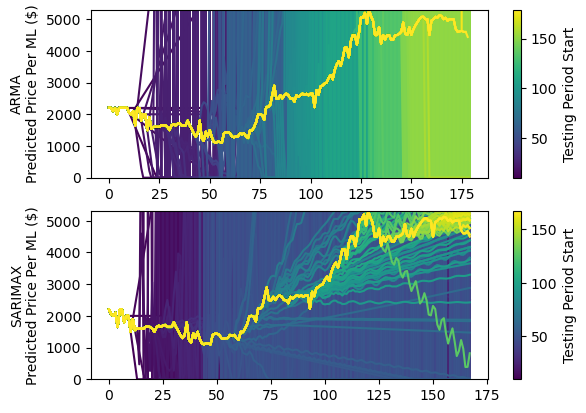

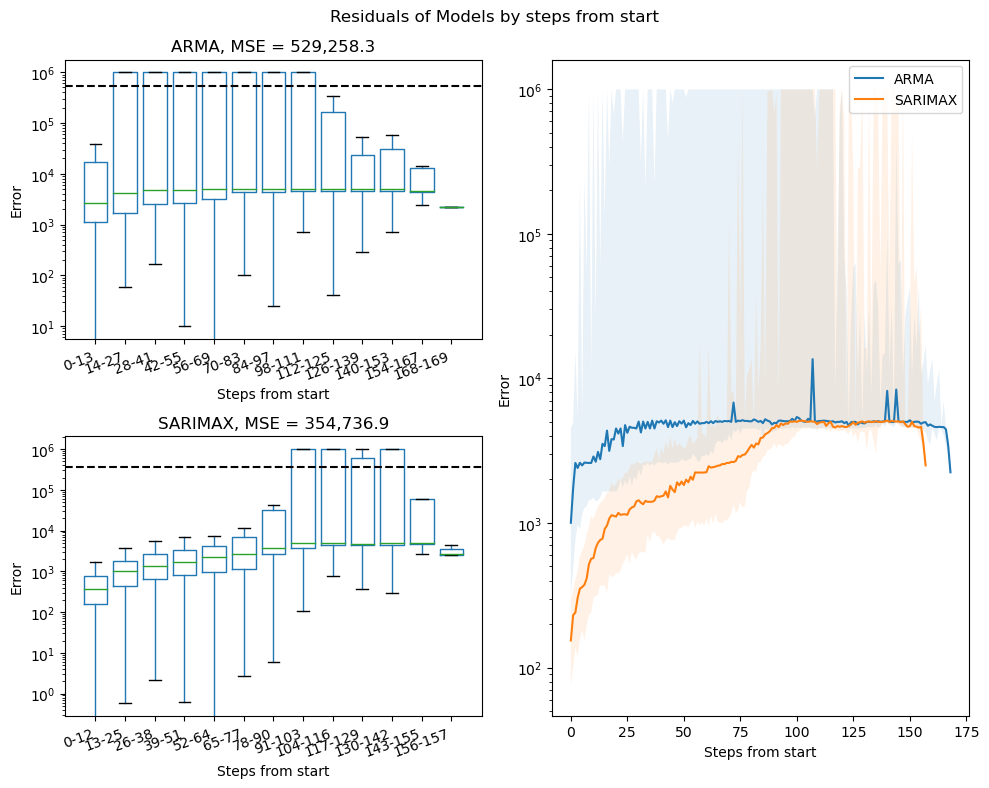

In [470]:
fig, ax = plt.subplots(2)

#r_fig, resid_ax = plt.subplots(2, figsize=(10, 8))
r_fig, resid_ax = plt.subplot_mosaic([[0, 2], [1, 2]], figsize=(10, 8))

read_and_plot(f'{arma_price}.csv', ax[0], resid_ax[0], resid_ax[2], label="ARMA")
ax[0].set_ylabel("ARMA\nPredicted Price Per ML ($)")

read_and_plot(f'{sarimax_price}.csv', ax[1], resid_ax[1], resid_ax[2], label="SARIMAX")
ax[1].set_ylabel("SARIMAX\nPredicted Price Per ML ($)")

r_fig.tight_layout()
r_fig.suptitle("Residuals of Models by steps from start")

resid_ax[2].legend()

(30600, 4)
(26544, 4)


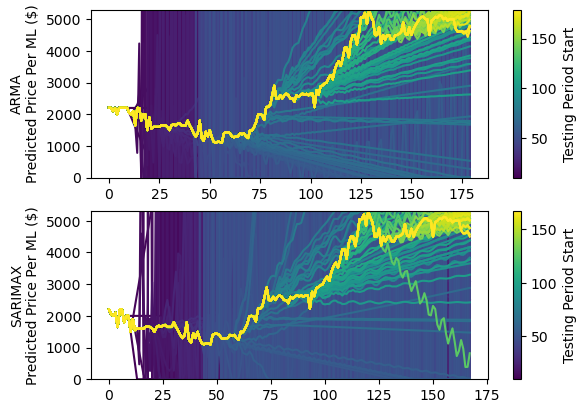

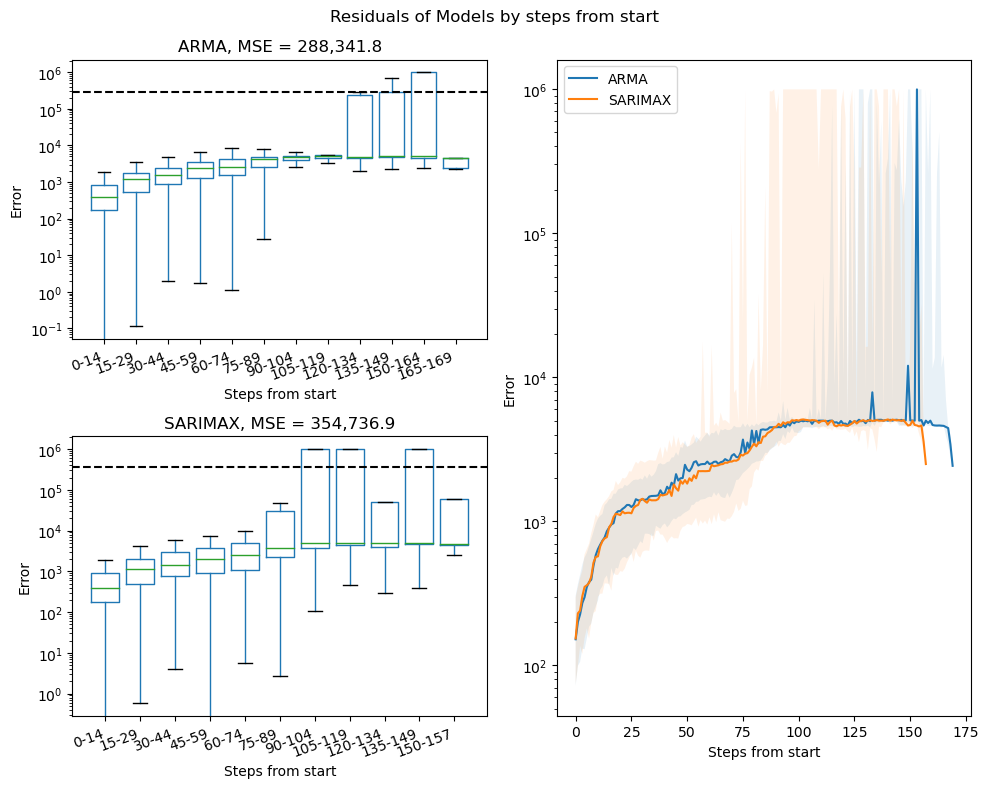

In [264]:
fig, ax = plt.subplots(2)

#r_fig, resid_ax = plt.subplots(2, figsize=(10, 8))
r_fig, resid_ax = plt.subplot_mosaic([[0, 2], [1, 2]], figsize=(10, 8))

read_and_plot(f'{arma_price}.csv', ax[0], resid_ax[0], resid_ax[2], label="ARMA")
ax[0].set_ylabel("ARMA\nPredicted Price Per ML ($)")

read_and_plot(f'{sarimax_price}.csv', ax[1], resid_ax[1], resid_ax[2], label="SARIMAX")
ax[1].set_ylabel("SARIMAX\nPredicted Price Per ML ($)")

r_fig.tight_layout()
r_fig.suptitle("Residuals of Models by steps from start")

resid_ax[2].legend()

In [50]:
df = pd.read_csv(f"{sarimax_price}.csv", index_col=0)
t = df.index.unique()

start=10
df.loc[df.start==start, :].loc[t, 'value'].clip(lower=0)

0      2200.0
1      2050.0
2      2000.0
3      2100.0
4      1650.0
        ...  
163    2000.0
164    2000.0
165    2000.0
166    2000.0
167    2000.0
Name: value, Length: 168, dtype: float64

In [37]:
df.loc[df.start==start, :].loc[t, :]

lower          upper   value  start
0         0.000000       0.000000  2200.0     10
0         0.000000       0.000000  2200.0     10
1         0.000000       0.000000  2200.0     10
1         0.000000       0.000000  2050.0     10
2         0.000000       0.000000  2100.0     10
..             ...            ...     ...    ...
175 -464163.933596  468563.933596  2200.0     10
176 -467691.663020  472091.663020  2200.0     10
177 -471226.892146  475626.892146  2200.0     10
178 -474769.606343  479169.606343  2200.0     10
179 -478319.791063  482719.791063  2200.0     10

[348 rows x 4 columns]

In [38]:
df.loc[df.start==start, :].loc[t, :].groupby(level=0).last()

lower          upper   value  start
0         0.000000       0.000000  2200.0     10
1         0.000000       0.000000  2050.0     10
2         0.000000       0.000000  2000.0     10
3         0.000000       0.000000  2100.0     10
4         0.000000       0.000000  1650.0     10
..             ...            ...     ...    ...
175 -464163.933596  468563.933596  2200.0     10
176 -467691.663020  472091.663020  2200.0     10
177 -471226.892146  475626.892146  2200.0     10
178 -474769.606343  479169.606343  2200.0     10
179 -478319.791063  482719.791063  2200.0     10

[180 rows x 4 columns]

<AxesSubplot: >

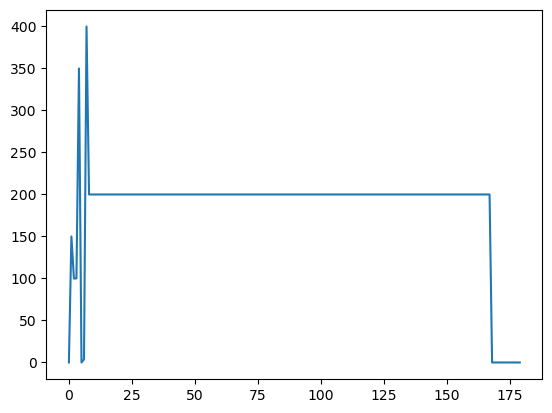

In [39]:
(df.loc[df.start==start, :].loc[t, 'value'].groupby(level=0).first() - df.loc[df.start==start, :].loc[t, 'value'].groupby(level=0).last()).plot()

In [40]:
df.loc[df.start==start, :].loc[t, :].groupby(level=0).first()

lower          upper   value  start
0         0.000000       0.000000  2200.0     10
1         0.000000       0.000000  2200.0     10
2         0.000000       0.000000  2100.0     10
3         0.000000       0.000000  2200.0     10
4         0.000000       0.000000  2000.0     10
..             ...            ...     ...    ...
175 -464163.933596  468563.933596  2200.0     10
176 -467691.663020  472091.663020  2200.0     10
177 -471226.892146  475626.892146  2200.0     10
178 -474769.606343  479169.606343  2200.0     10
179 -478319.791063  482719.791063  2200.0     10

[180 rows x 4 columns]

In [104]:
df.loc[df.start==start, :].loc[100]

lower          upper    value  start
100 -222164.108571  226564.108571   2200.0     10
100 -216593.047274  183793.047274 -16400.0     10

<AxesSubplot: xlabel='start'>

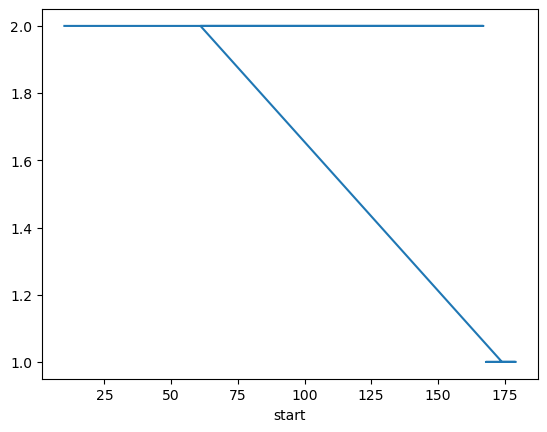

In [41]:
df.loc[100, :].start.value_counts().plot()

In [12]:
df2 = pd.read_csv(f"{arma_price}.csv", index_col=0)
t = df2.index.unique()

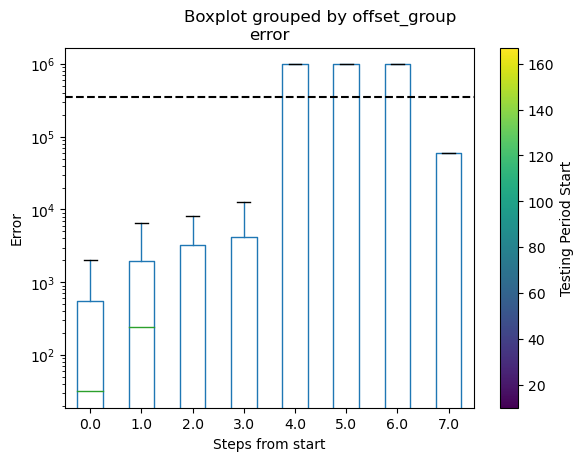

In [96]:
plot_residuals(df, plt.gca())

plt.yscale('log')


(0.0, 10000000.0)

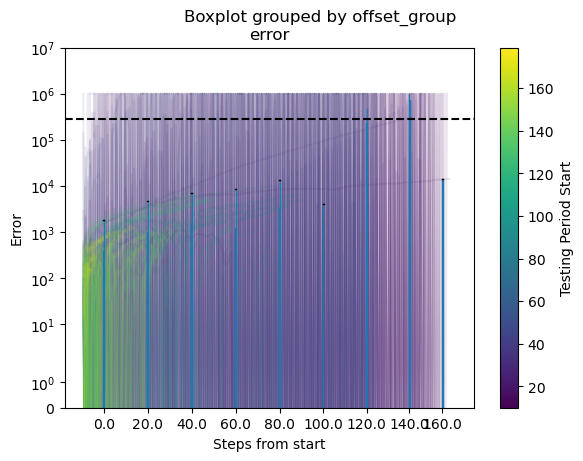

In [103]:
plot_residuals(df2, plt.gca())

plt.yscale('symlog')

plt.ylim(0, 10000000)

<AxesSubplot: xlabel='start'>

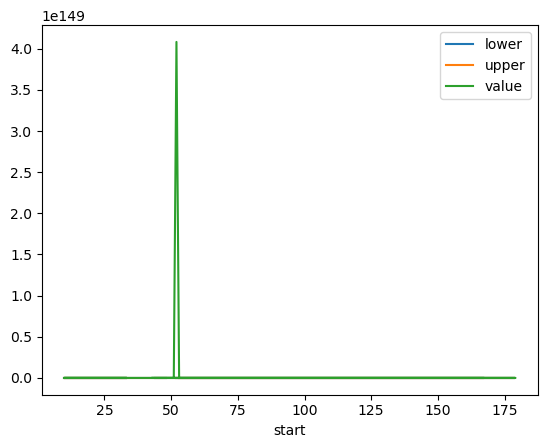

In [116]:
df.loc[100, :].plot(x='start')

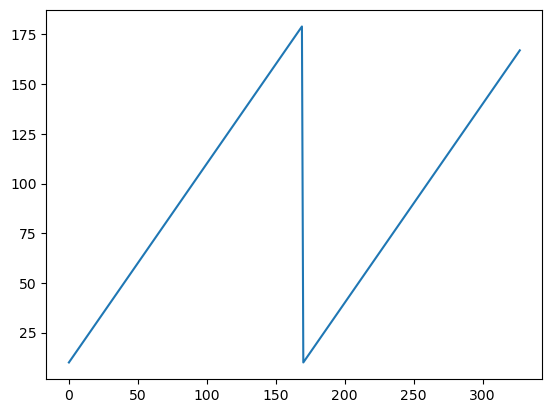

In [118]:
plt.plot(range(len(df.loc[100, :])), df.loc[100, :].start)

In [42]:
new_data

Principal Component 1  Principal Component 2  \
2010-01-31             -19.209868               9.529664   
2010-02-28             -17.120963              10.422646   
2010-03-31             -17.528443               6.115125   
2010-04-30             -11.297777               3.410159   
2010-05-31              -7.291097              -8.415412   
...                           ...                    ...   
2023-08-31               1.732751             -15.636383   
2023-09-30               1.376073              -5.651668   
2023-10-31              10.921738              -2.393459   
2023-11-30              -8.940730               7.492700   
2023-12-31              -8.858386              10.787594   

            Principal Component 3  Principal Component 4  \
2010-01-31               7.242644              15.392027   
2010-02-28               6.059921              16.088172   
2010-03-31               3.454696              15.340933   
2010-04-30              -3.450176              16.029449   
2010-05-31             -10.209559              15.711937   
...                           ...                    ...   
2023-08-31              -1.411498             -13.670757   
2023-09-30              -1.847926             -12.715818   
2023-10-31               2.649653             -14.382879   
2023-11-30               7.377768             -11.081445   
2023-12-31              10.829396             -10.908082   

            Principal Component 5  Principal Component 6  \
2010-01-31               2.845848              -3.879656   
2010-02-28              -0.367599              -4.369546   
2010-03-31               2.443464              -4.578859   
2010-04-30               3.009757              -4.865545   
2010-05-31               1.064401              -5.425465   
...                           ...                    ...   
2023-08-31               3.662134              -3.127488   
2023-09-30               3.137618               0.539230   
2023-10-31               1.609153              10.679065   
2023-11-30               0.865717               3.688180   
2023-12-31              -3.623718               7.690071   

            Principal Component 7  Principal Component 8  \
2010-01-31             -14.952931              14.811881   
2010-02-28             -13.775462              15.237759   
2010-03-31             -14.330642              13.944460   
2010-04-30             -12.869744              12.548960   
2010-05-31             -10.806729              11.652790   
...                           ...                    ...   
2023-08-31              -6.273158               5.523166   
2023-09-30              -2.871948               4.152377   
2023-10-31              -0.299535               1.289862   
2023-11-30               3.304283              -0.244916   
2023-12-31               6.864198               0.698720   

            Principal Component 9  Principal Component 10  Price Per ML ($)2  \
2010-01-31             -11.454590                0.656678             2200.0   
2010-02-28             -11.073495                0.795421             2000.0   
2010-03-31             -10.863117                0.881191             2000.0   
2010-04-30              -9.634700               -0.148547             2047.5   
2010-05-31              -9.906245                0.698912             2000.0   
...                           ...                     ...                ...   
2023-08-31               6.285723               -9.610014             7250.0   
2023-09-30               2.872598              -10.855144             7000.0   
2023-10-31               1.543940              -14.801504             7000.0   
2023-11-30              -2.195818              -16.037247             6892.5   
2023-12-31              -6.957538              -17.074371             7000.0   

            Price Per ML ($)  Volume Traded (ML)  
2010-01-31            2200.0              1885.9  
2010-02-28            2050.0               613.8  
2010-03-31    

In [211]:
df

lower        upper        value  start     Observed
0       0.000000     0.000000  2200.000000     10  2200.000000
1       0.000000     0.000000  2050.000000     10  2050.000000
2       0.000000     0.000000  2000.000000     10  2000.000000
3       0.000000     0.000000  2100.000000     10  2100.000000
4       0.000000     0.000000  1650.000000     10  1650.000000
..           ...          ...          ...    ...          ...
163     0.000000     0.000000  4700.000000    167  4700.000000
164     0.000000     0.000000  4600.000000    167  4600.000000
165     0.000000     0.000000  4615.000000    167  4615.000000
166     0.000000     0.000000  4630.000000    167  4630.000000
167  4159.767061  4840.173626  4499.970344    167  4499.970344

[26544 rows x 5 columns]

AssertionError: 1

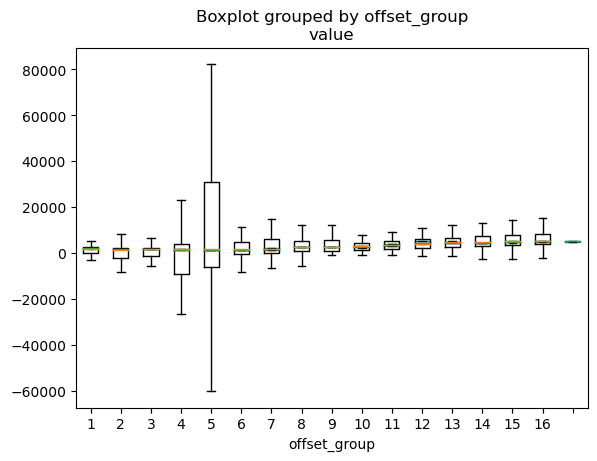

In [220]:
group_size=10
df = df.assign(offset_group=(np.floor((df.index)/group_size)*group_size).astype(int))

df[df.index<df.start].boxplot(column='value', by='offset_group', showfliers=False, grid=False)
df[df.index>df.start].boxplot(column='value', by='offset_group', showfliers=False, grid=False, ax=plt.gca())
plt.ylim(0, 10000)

array([<AxesSubplot: xlabel='start'>, <AxesSubplot: xlabel='start'>,
       <AxesSubplot: xlabel='start'>, <AxesSubplot: xlabel='start'>,
       <AxesSubplot: xlabel='start'>], dtype=object)

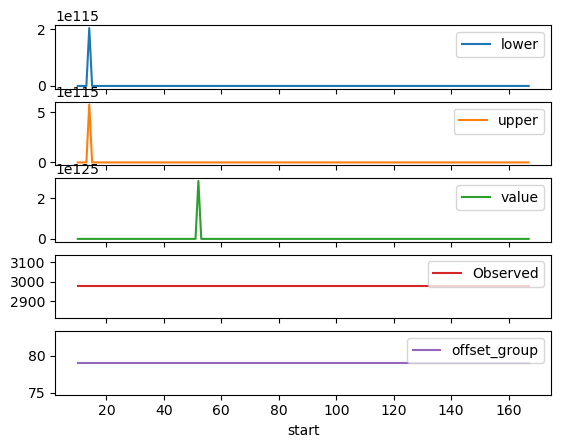

In [221]:
df.groupby('start').mean().plot(subplots=True)


In [ ]:
Q1 = data.set_index(date_col).sort_index()[val_col].dropna().rolling(offset).quantile(0.25)
    Q3 = data.set_index(date_col).sort_index()[val_col].dropna().rolling(offset).quantile(0.75)
    Q2 = data.set_index(date_col).sort_index()[val_col].dropna().rolling(offset).quantile(0.5)

In [374]:
def rolling_IQR(data, val_col='Price Per ML ($)',  date_col = 'Create_date', offset = '365D', min_periods=5, qsize=0.25):

    data = data.sort_values(date_col)

    Q1 = data.set_index(date_col).sort_index()[val_col].rolling(offset, min_periods=min_periods).quantile(0.5-qsize, interpolation='nearest')
    Q3 = data.set_index(date_col).sort_index()[val_col].rolling(offset, min_periods=min_periods).quantile(0.5+qsize)
    Q2 = data.set_index(date_col).sort_index()[val_col].rolling(offset, min_periods=min_periods).quantile(0.5)
    s = data.set_index(date_col).sort_index()[val_col].rolling(offset, min_periods=min_periods).std()

    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 

    filtered_data = data[(data[val_col] >= lower_bound.values) & (data[val_col] <= upper_bound.values)]

    return filtered_data, (Q1, Q2, Q3, s)

In [375]:
df = pd.read_csv(f"{sarimax_price}.csv", index_col=0)

df["Observed"] = df.index
df["Observed"] = df["Observed"].map(df.loc[df.start==df.start.max(), 'value'])

In [396]:
df = df.assign(period=df.index, value=df.value.clip(lower=0), predicted=df.value.clip(lower=0), lower=df.lower.clip(lower=0), upper=df.upper.clip(lower=0))
df.loc[df.period<df.start, 'predicted'] = np.nan

df.loc[df.period-df.start>100, 'predicted'] = np.nan

<AxesSubplot: >

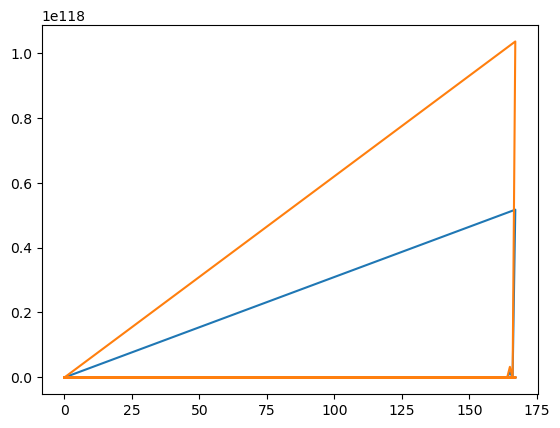

In [397]:
df.lower.plot()
df.upper.plot()

<AxesSubplot: xlabel='start'>

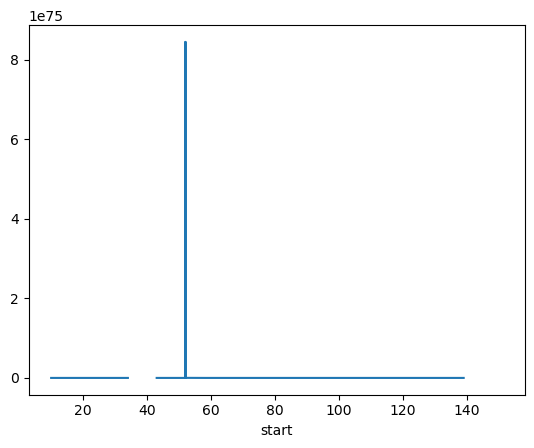

In [403]:
filtered_df, Qs = rolling_IQR(df, val_col='predicted', date_col='start', offset=180, min_periods=30, qsize=0.25)

#Qs[0].plot()
Qs[1].plot()
#Qs[2].plot()
#df.Observed.plot()

<AxesSubplot: xlabel='period'>

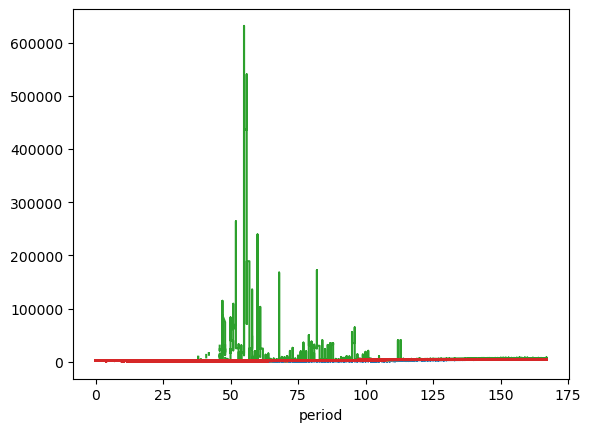

In [399]:
filtered_df, Qs = rolling_IQR(df, val_col='predicted', date_col='period', offset=180, min_periods=30, qsize=0.25)

Qs[0].plot()
Qs[1].plot()
Qs[2].plot()
df.Observed.plot()

<AxesSubplot: >

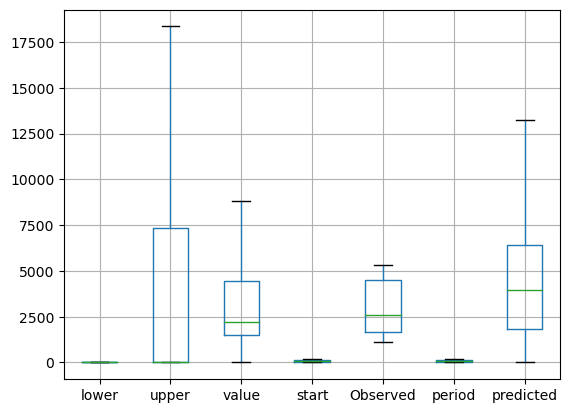

In [398]:
df.boxplot(showfliers=False)

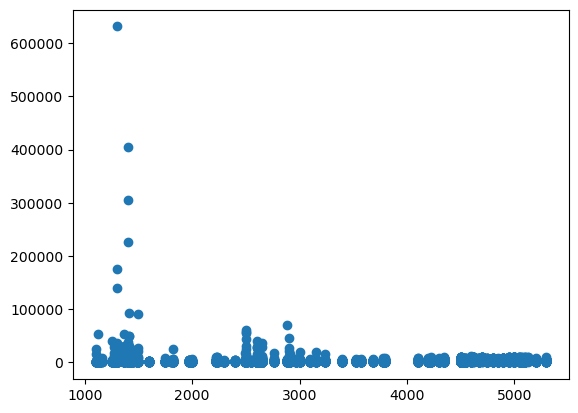

In [401]:
plt.scatter(filtered_df.Observed, filtered_df.predicted)

In [388]:
filtered_df.predicted.std()

10359.138192991948

In [381]:
Qs[3].median()

5.746674267591544e+61

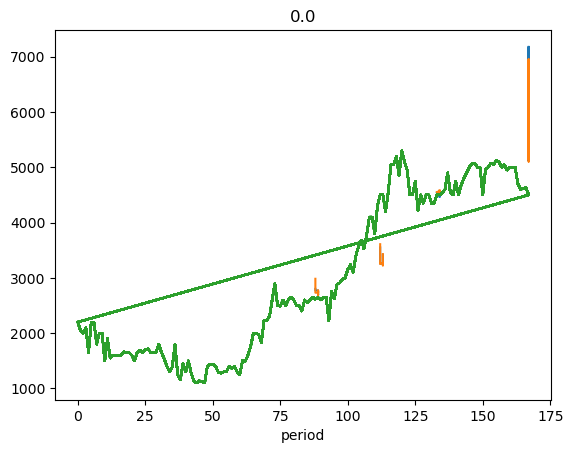

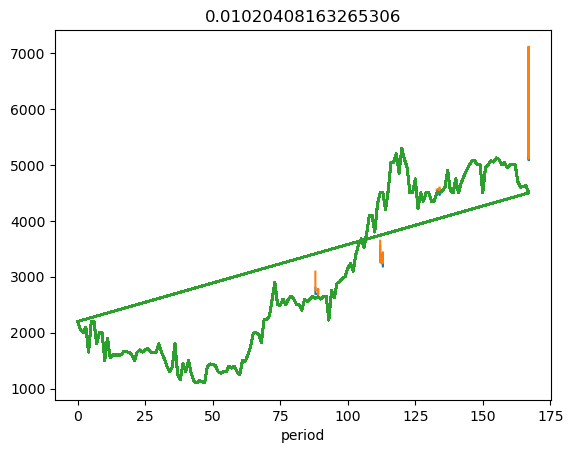

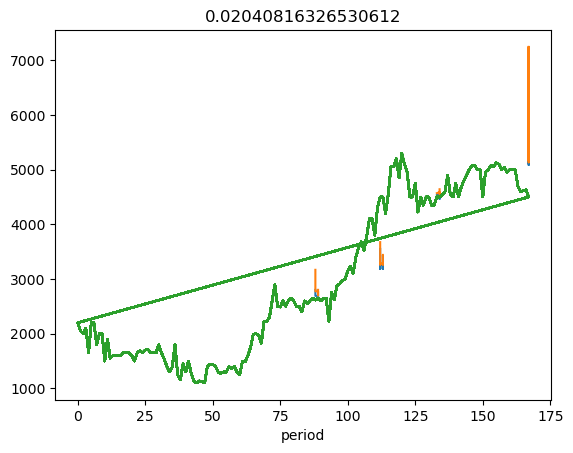

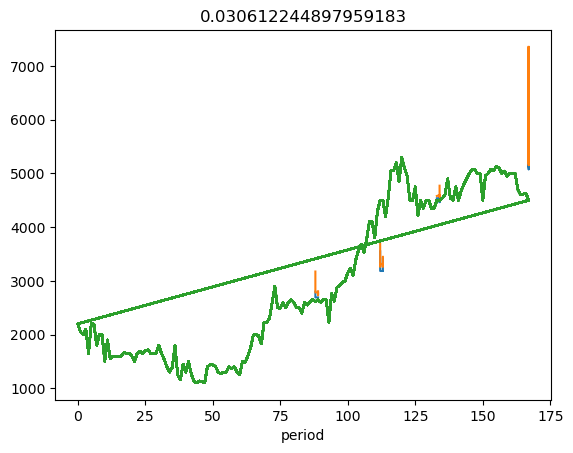

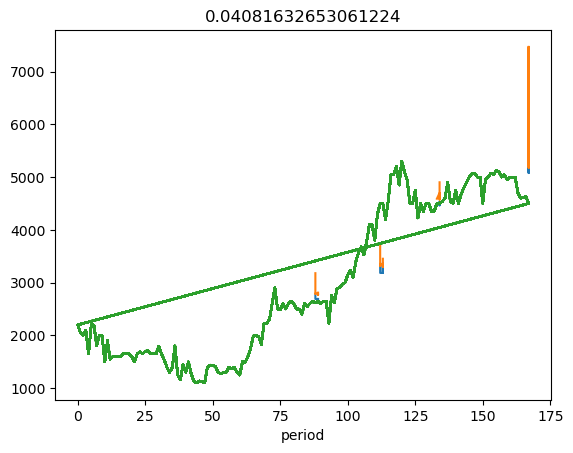

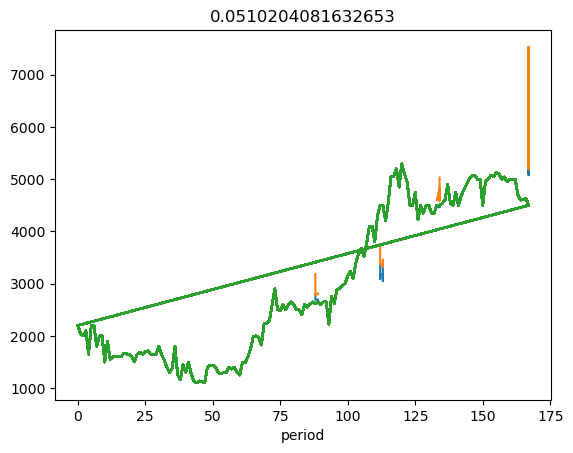

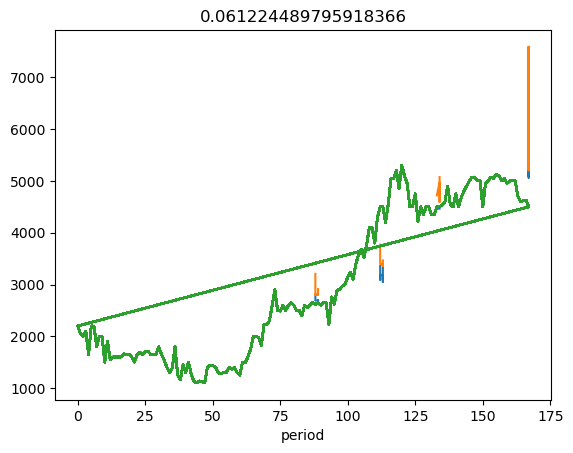

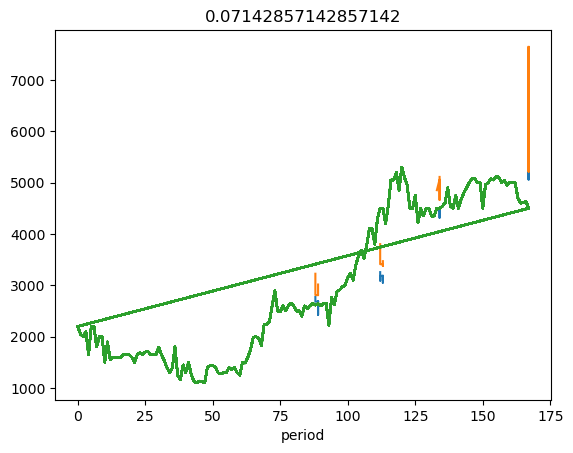

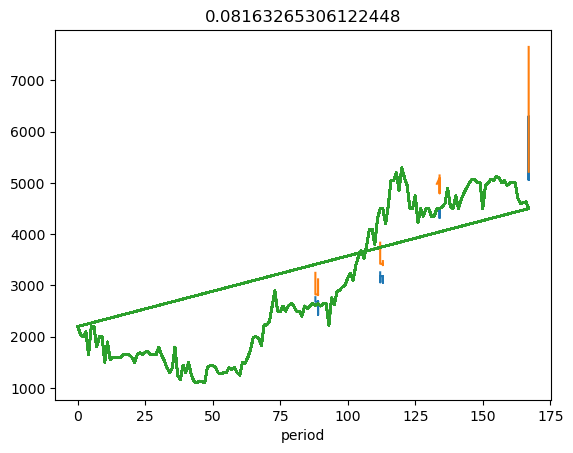

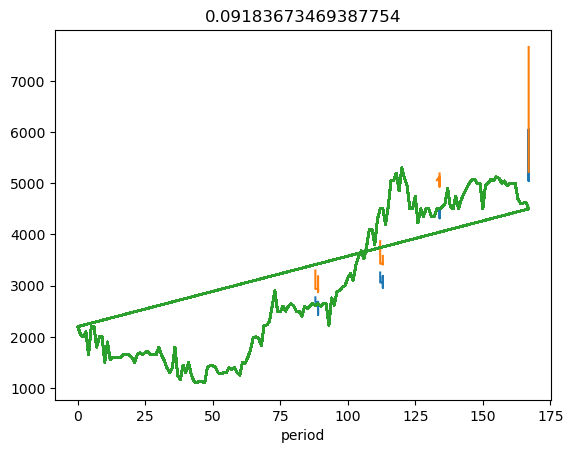

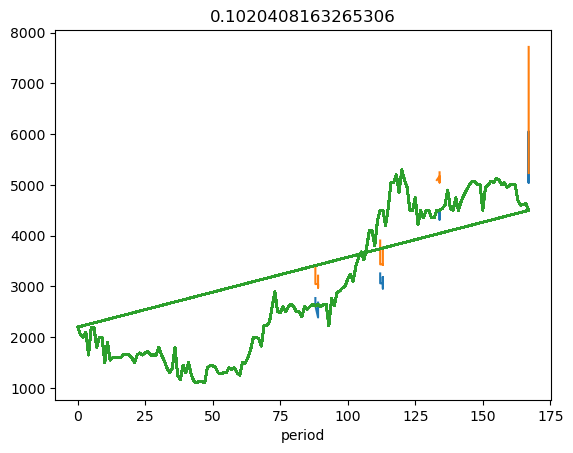

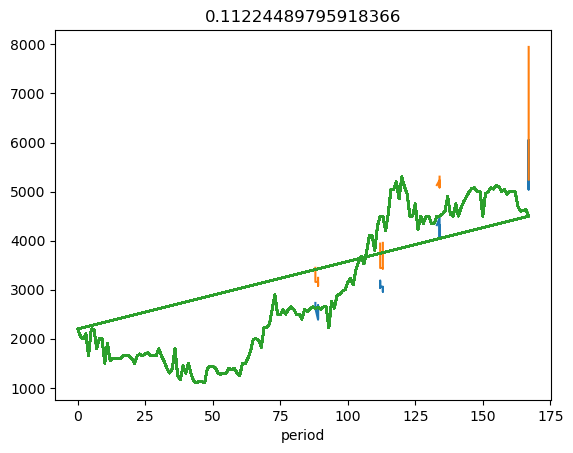

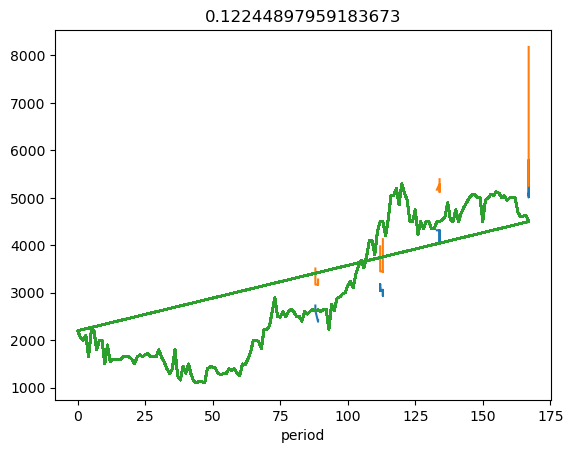

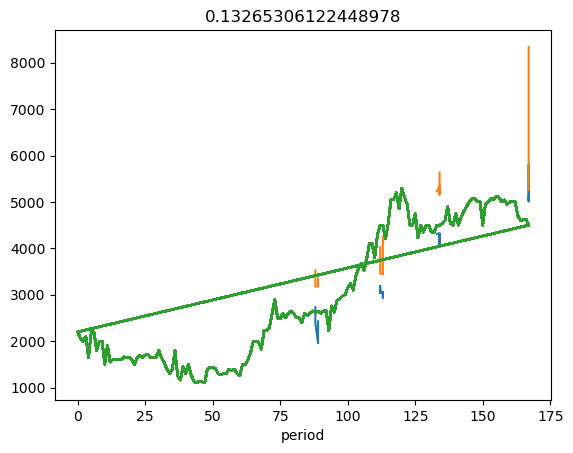

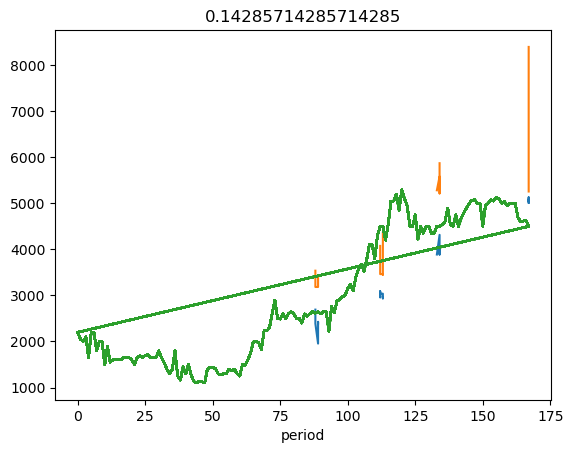

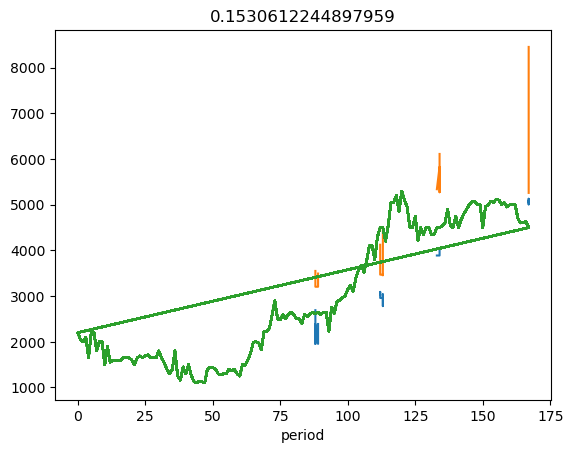

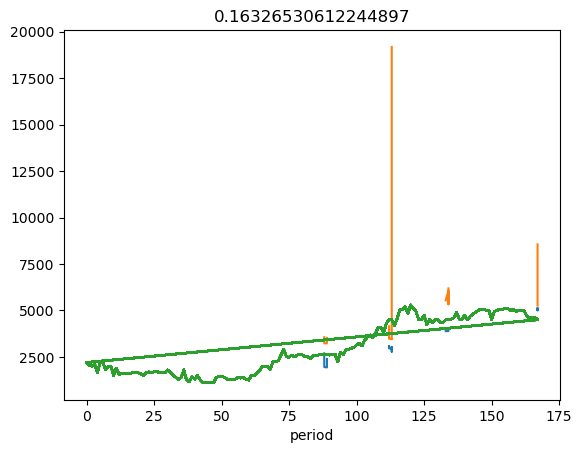

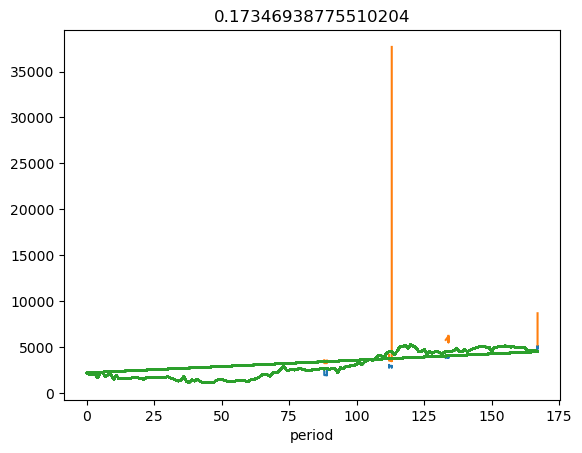

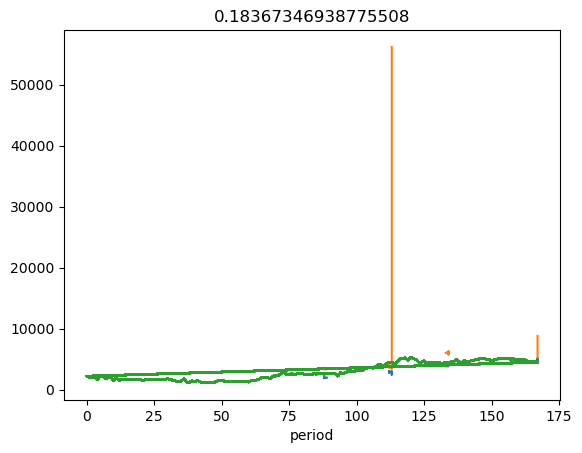

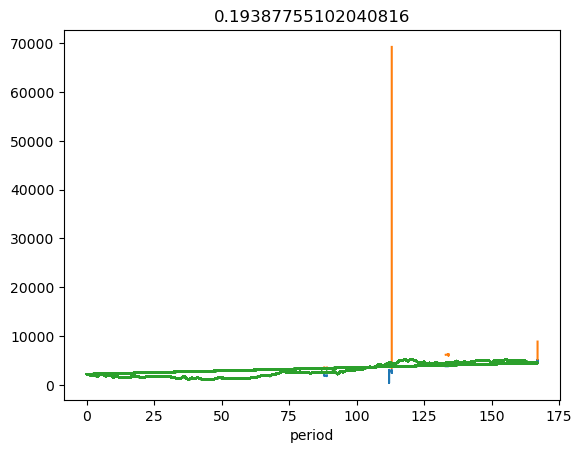

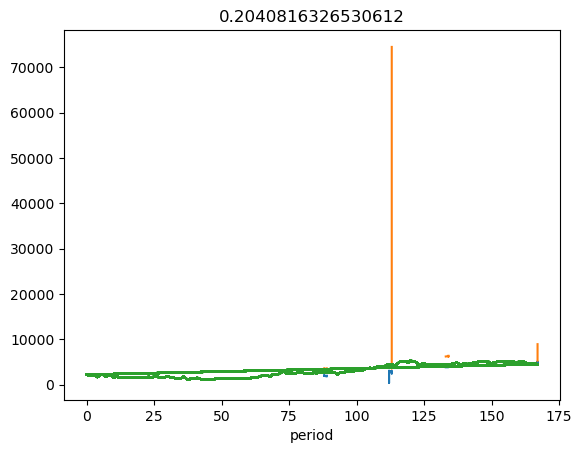

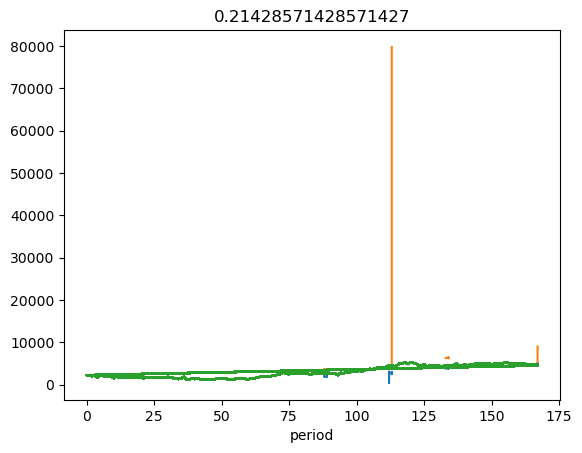

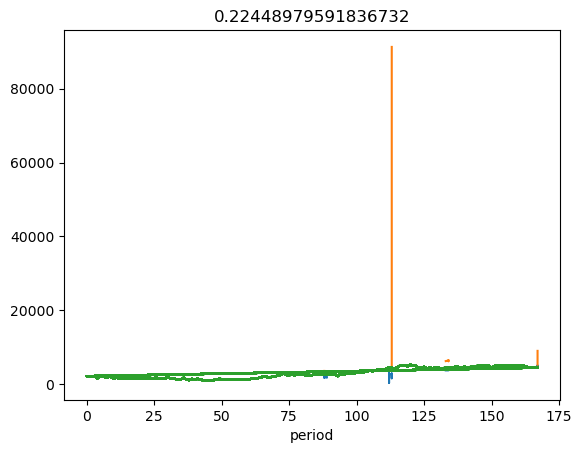

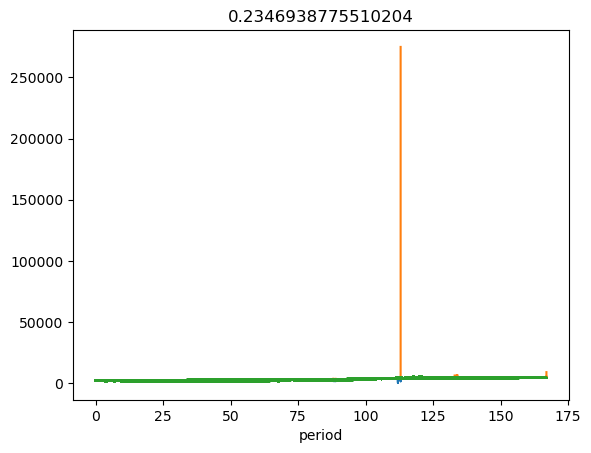

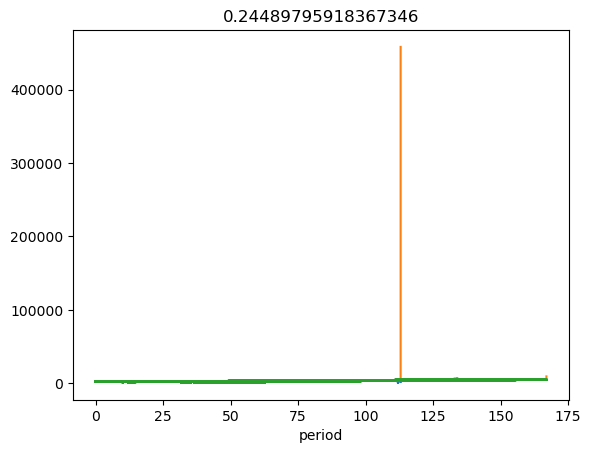

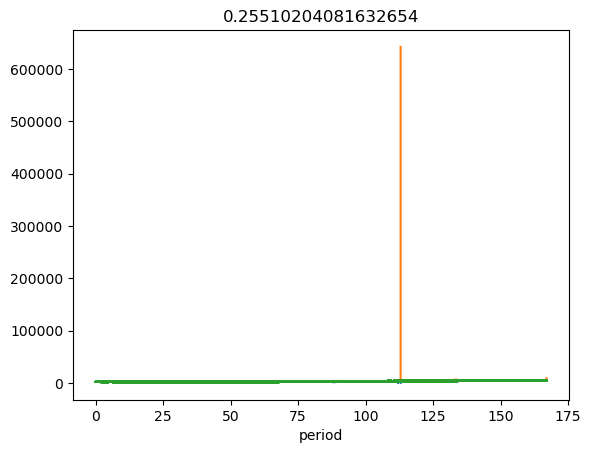

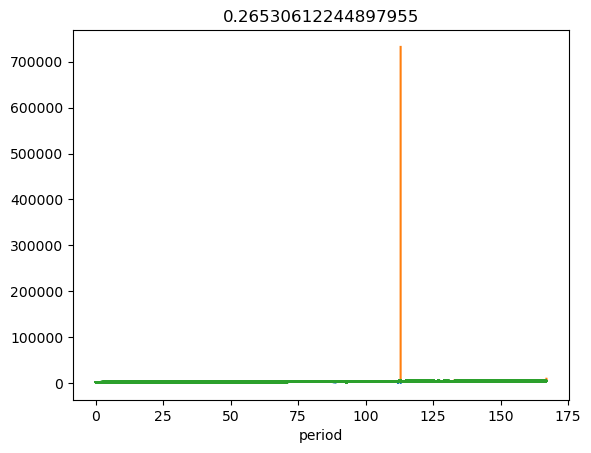

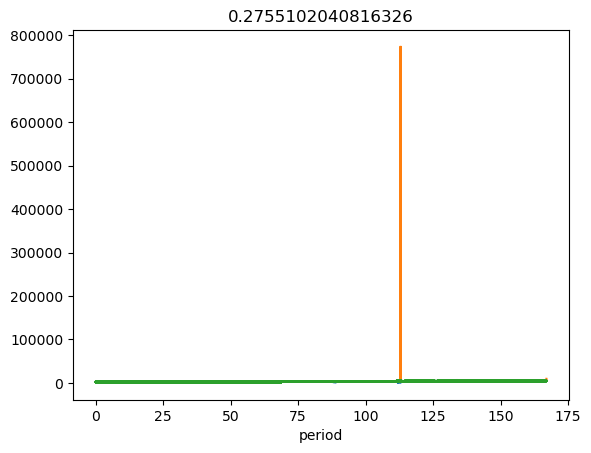

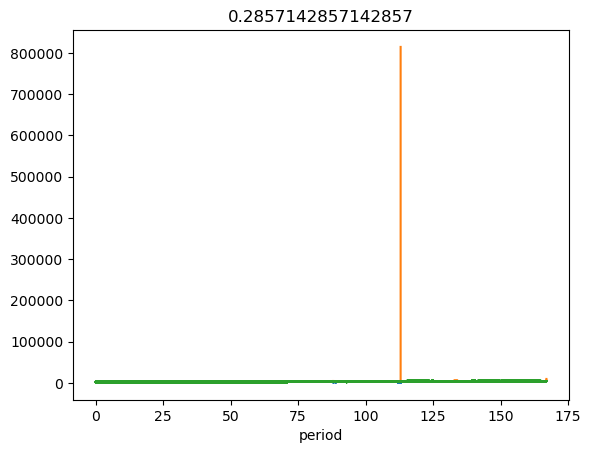

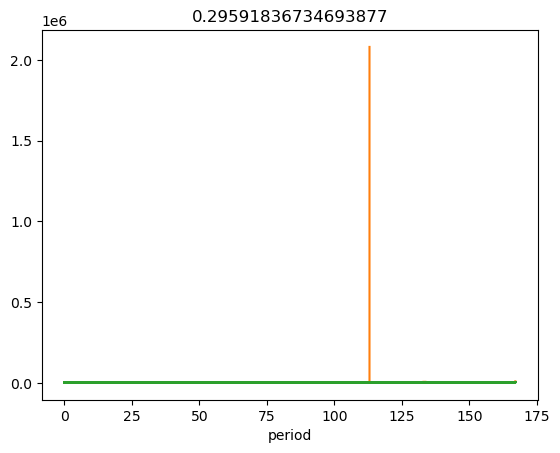

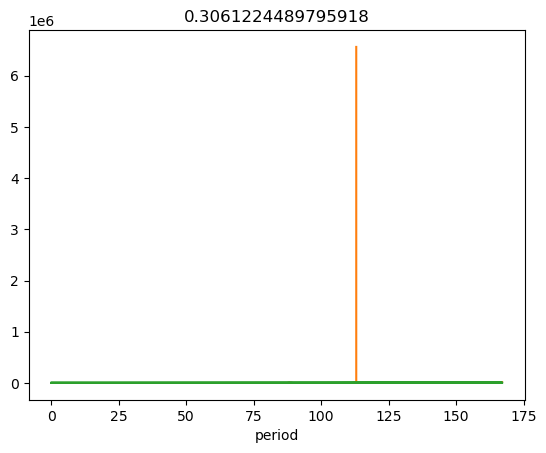

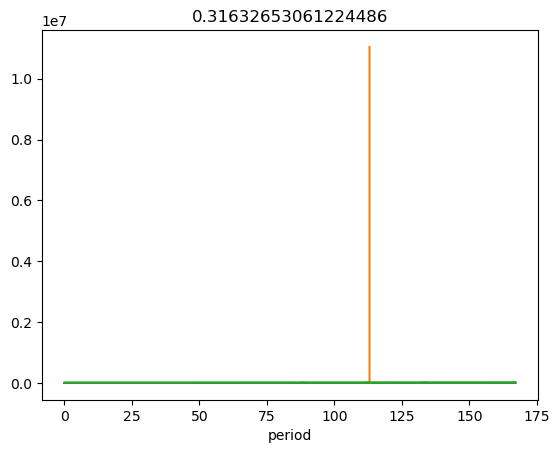

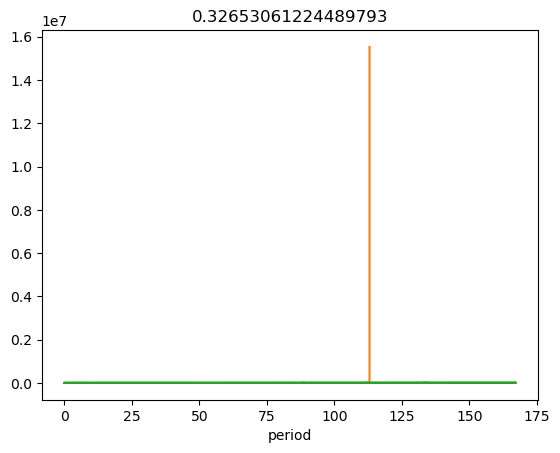

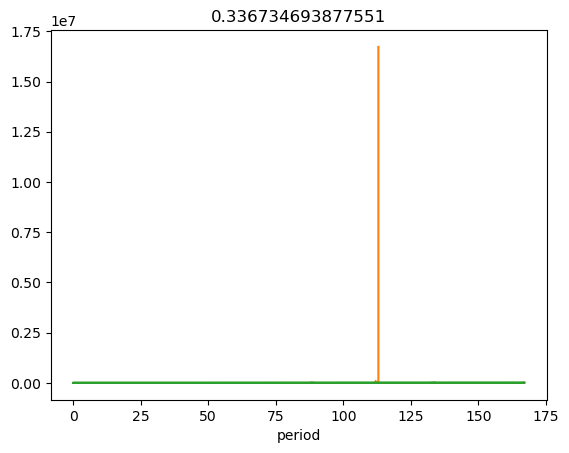

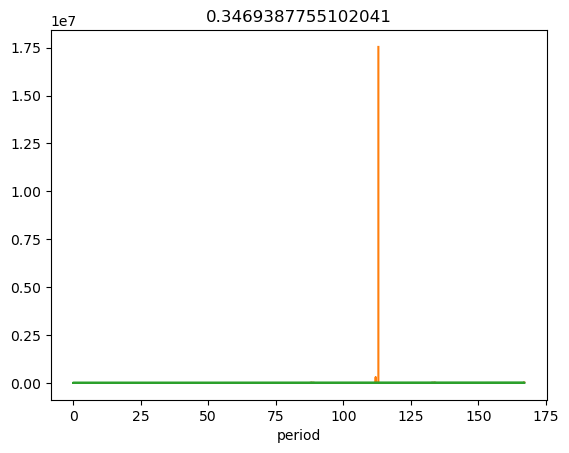

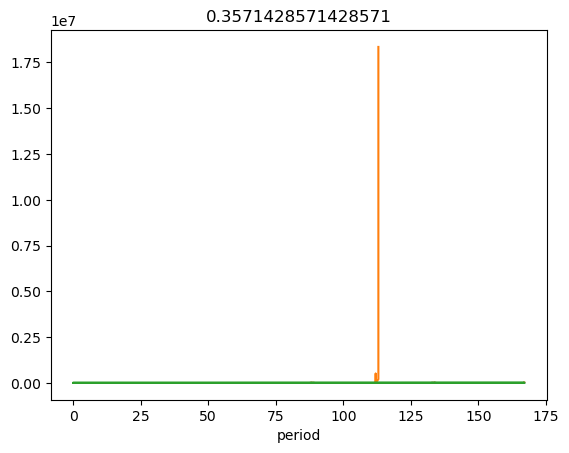

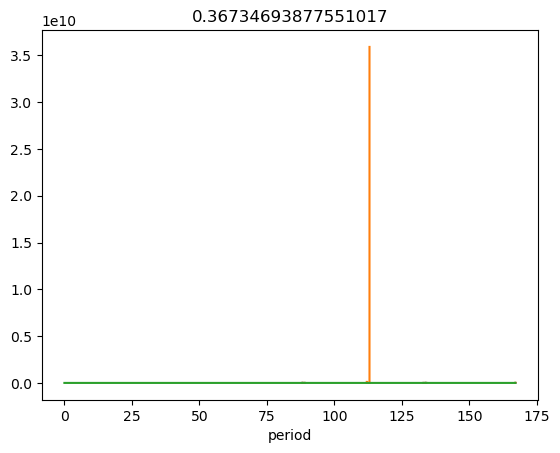

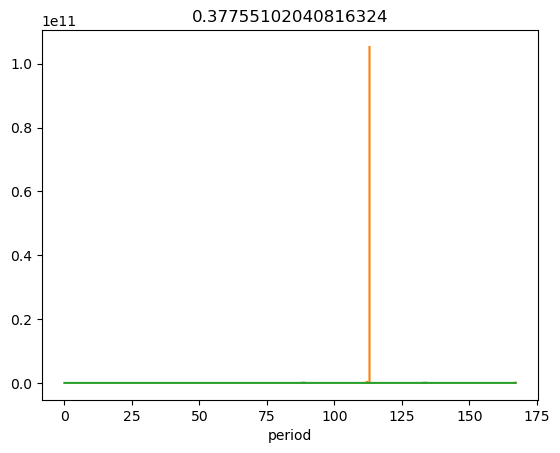

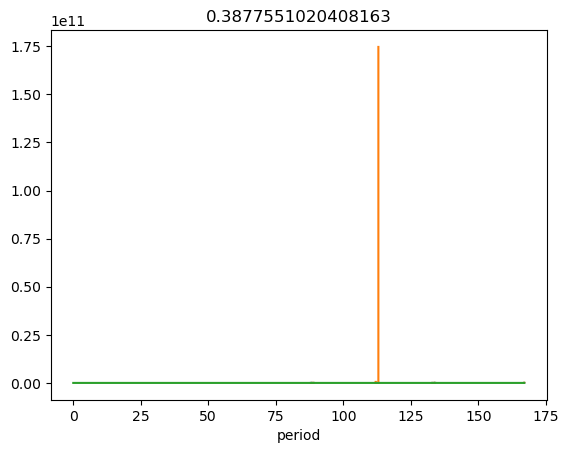

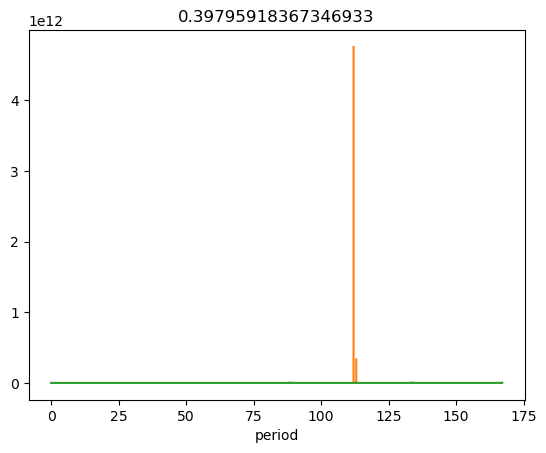

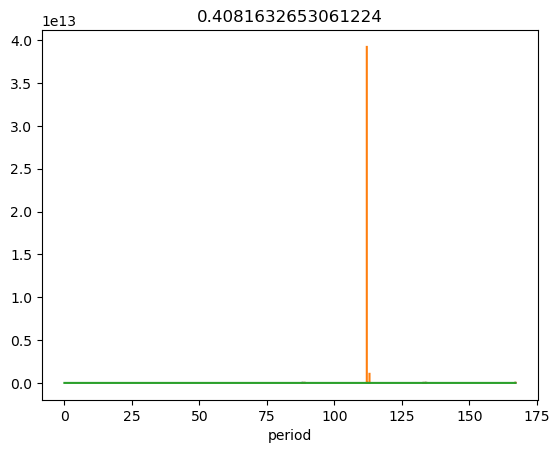

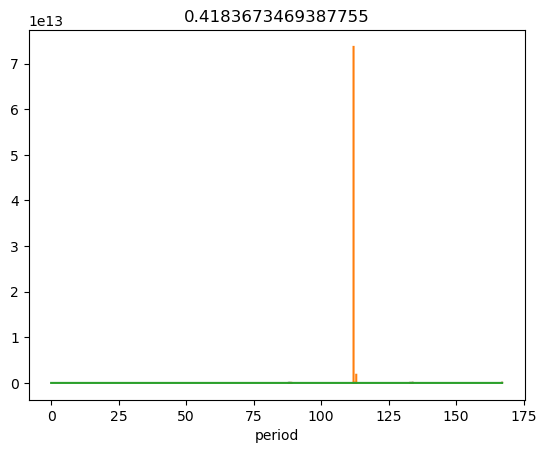

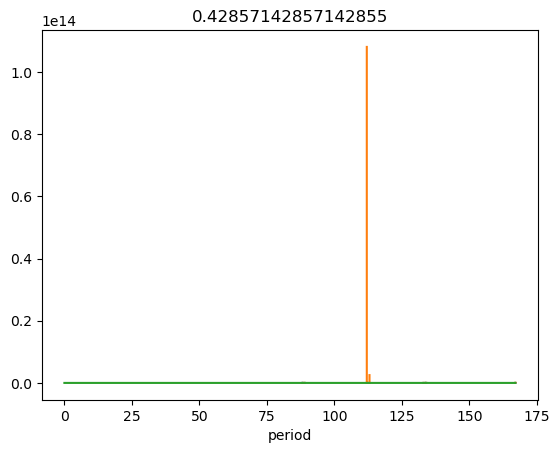

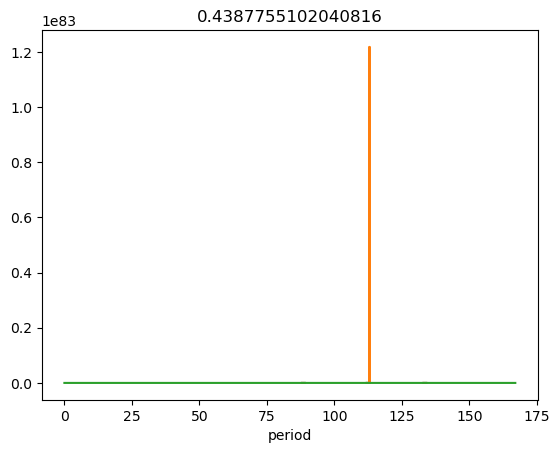

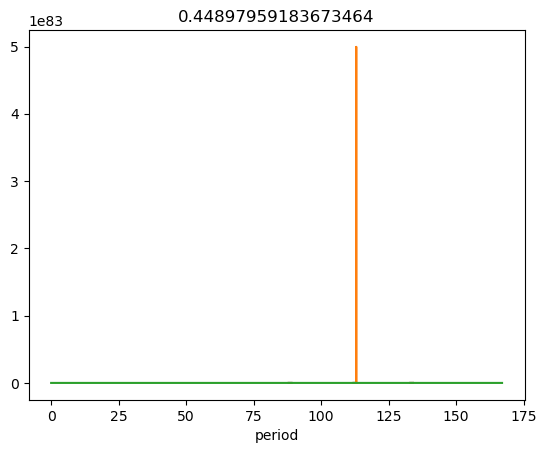

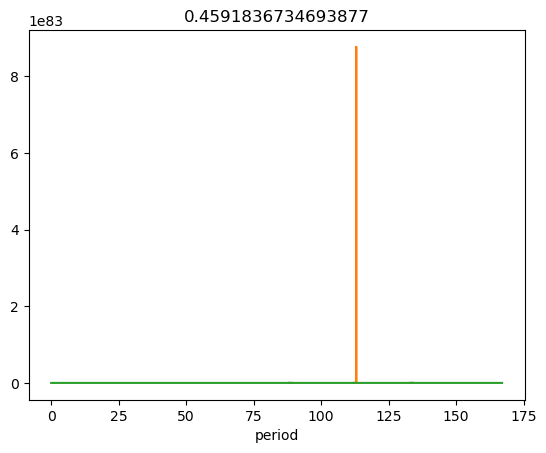

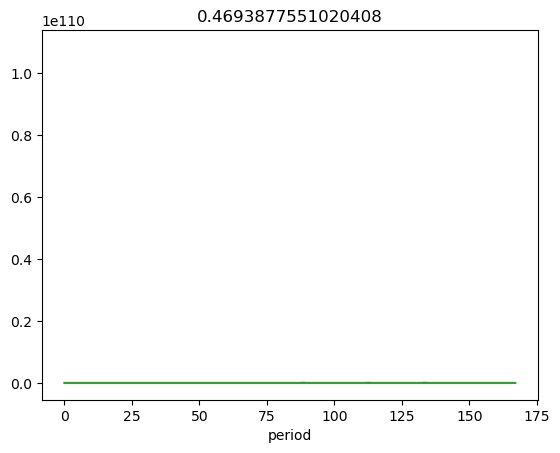

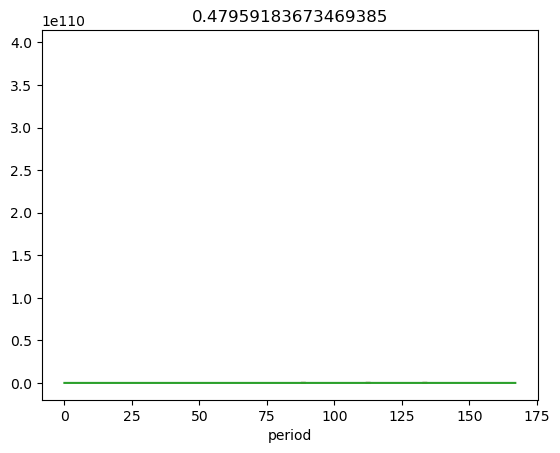

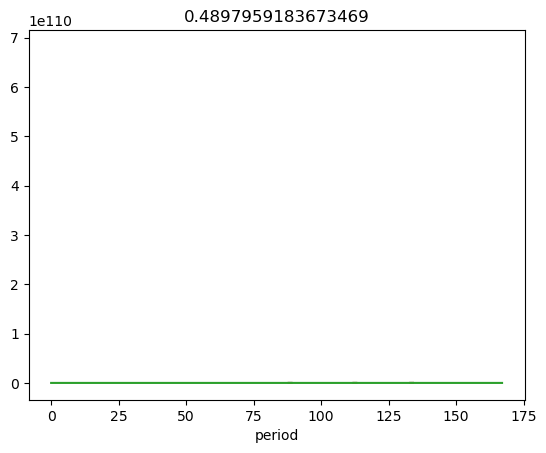

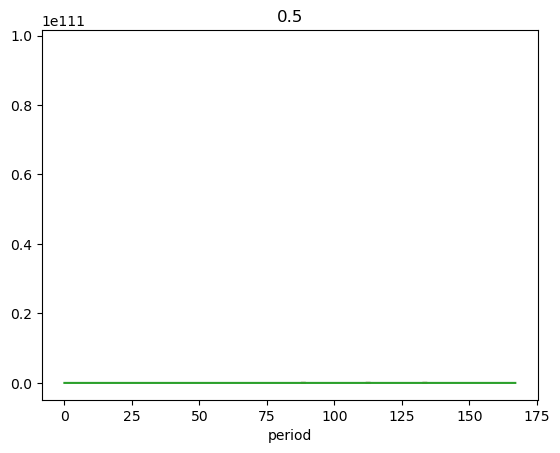

In [370]:
mp = 30
for qs in np.linspace(0, 0.5):
    filtered_df, Qs = rolling_IQR(df, val_col='predicted', date_col='period', offset=36, min_periods=mp, qsize=qs)

    Qs[0].plot()
    Qs[2].plot()
    df.Observed.plot()
    plt.title(qs)
    plt.show()

In [291]:
filtered_df

lower         upper        value  start     Observed  \
149  2.645689e+03  1.027425e+04  6459.967245    106  5000.000000   
149 -6.164846e+02  8.026092e+03  3704.803649     91  5000.000000   
150  2.084549e+03  8.185720e+03  5135.134637    104  4500.000000   
150  1.142450e+03  7.942643e+03  4542.546233    100  4500.000000   
150  3.844832e+03  6.043999e+03  4944.415487    141  4500.000000   
..            ...           ...          ...    ...          ...   
167 -1.176257e+03  4.678048e+02     0.000000     55  4499.970344   
167 -1.733589e+09  1.222171e+09     0.000000     56  4499.970344   
167 -5.943567e+04  6.558823e+04  3076.282083     29  4499.970344   
167           NaN           NaN     0.000000     45  4499.970344   
167           NaN           NaN     0.000000     43  4499.970344   

     offset_group  period    predicted  
149           140     149  6459.967245  
149           140     149  3704.803649  
150           150     150  5135.134637  
150           150     150  4542.546233  
150           150     150  4944.415487  
..            ...     ...          ...  
167           160     167     0.000000  
167           160     167     0.000000  
167           160     167  3076.282083  
167           160     167     0.000000  
167           160     167     0.000000  

[248 rows x 8 columns]

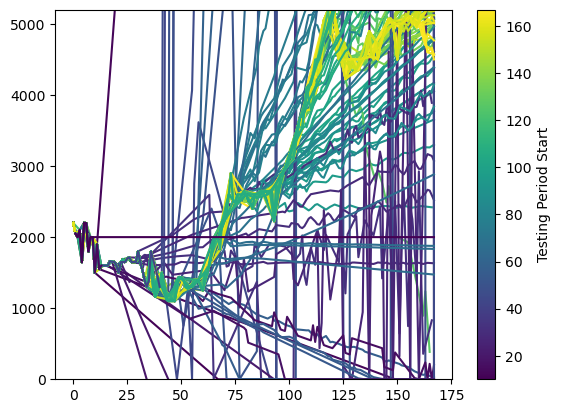

In [261]:
fig, ax = plt.subplots()
plot_dataset(filtered_df, ax)

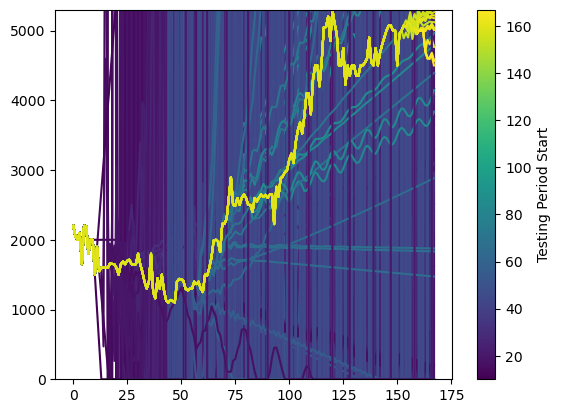

In [263]:
fig, ax = plt.subplots()
plot_dataset(df, ax)

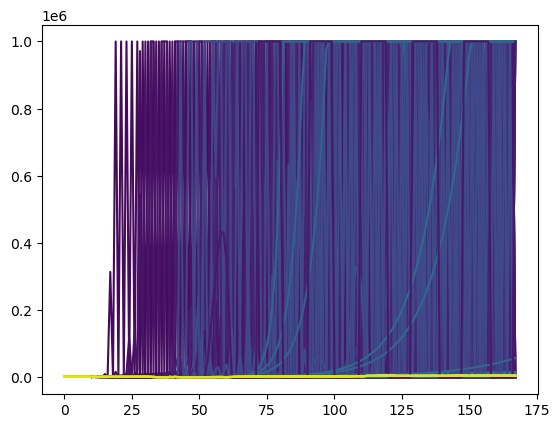

In [238]:
fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(df.start.unique()), vmax=max(df.start.unique()))
map = cm.ScalarMappable(norm=norm, cmap='viridis')

t = df.index.unique()

# Plotting the data for different starts
for start in df.start.unique():
    ax.plot(t, get_predictions(df, t, start), c=map.get_cmap()(norm(start)))

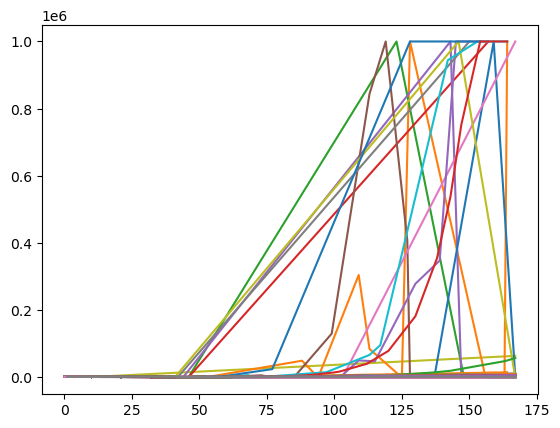

In [258]:
fig, ax = plt.subplots()
t = filtered_df.index.unique()

# Plotting the data for different starts
for start in filtered_df.start.unique():
    pred = get_predictions(filtered_df, t, start)
    ax.plot(pred.index, pred)

In [242]:
for start in filtered_df.start.unique():
    get_predictions(filtered_df, t, start)

           lower         upper        value  start     Observed  offset_group  \
0       0.000000      0.000000  2200.000000    115  2200.000000             0   
1       0.000000      0.000000  2050.000000    115  2050.000000             0   
2       0.000000      0.000000  2000.000000    115  2000.000000             0   
3       0.000000      0.000000  2100.000000    115  2100.000000             0   
4       0.000000      0.000000  1650.000000    115  1650.000000             0   
..           ...           ...          ...    ...          ...           ...   
159  4027.322887  11375.689419  7701.506153    115  4950.000000           150   
163  3946.298386  12084.502871  8015.400629    115  4700.000000           160   
165  3664.349307  12206.066592  7935.207950    115  4615.000000           160   
166  3771.884143  12524.042695  8147.963419    115  4630.000000           160   
167  3841.924172  12794.570551  8318.247361    115  4499.970344           160   

     period  
0         0  

In [251]:
get_predictions(filtered_df, t, start)

array([2050.   , 2000.   , 2100.   , 1650.   , 2200.   , 2196.205,
       1800.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   , 2000.   , 2000.   , 2000.   , 2000.   ,
       2000.   , 2000.   ])

<AxesSubplot: xlabel='period'>

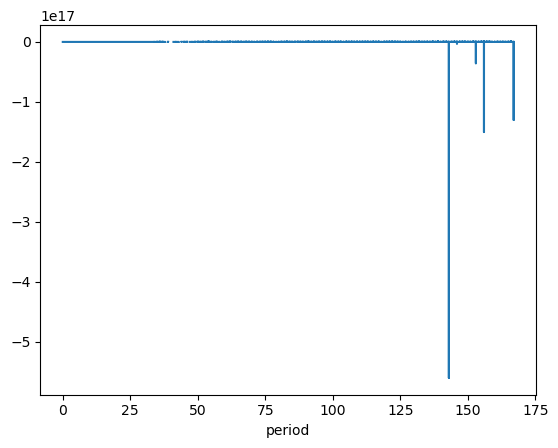

In [268]:
Qs[0].plot()

<AxesSubplot: xlabel='period'>

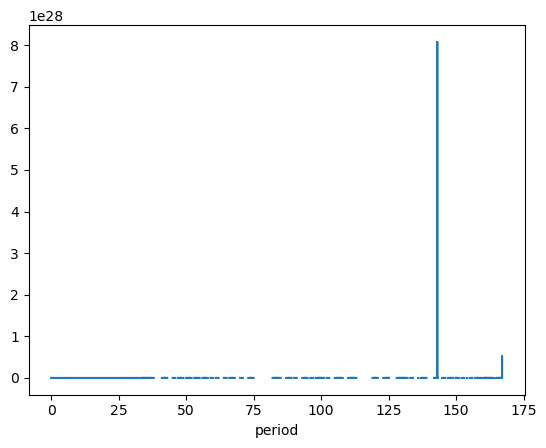

In [270]:
Qs[2].plot()

In [419]:
annual_grouped = zone_data_6.groupby(pd.Grouper(key="Create_date", freq='6M'))
# Take the median of the monthly price
annual_zone_data =  annual_grouped[["Price Per ML ($)", "Volume Traded (ML)"]].median().fillna(0)
# Take the sum of the monthly volume traded
annual_zone_data["Volume Traded (ML)"] =annual_grouped["Volume Traded (ML)"].sum().fillna(0)



C:\Users\Meredith\AppData\Local\Temp\ipykernel_11324\1493650331.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  annual_grouped = zone_data_6.groupby(pd.Grouper(key="Create_date", freq='6M'))


In [428]:
make_dataset(annual_zone_data, "Price Per ML ($)", "ARMA annual")

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\

In [411]:
std_price = grouped[["Price Per ML ($)", "Volume Traded (ML)"]].std()

In [413]:
make_dataset(std_price, "Price Per ML ($)", "ARMA std price")

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\

(30600, 4)
(651, 4)


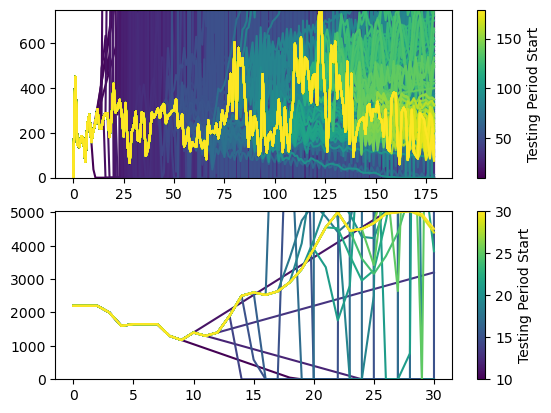

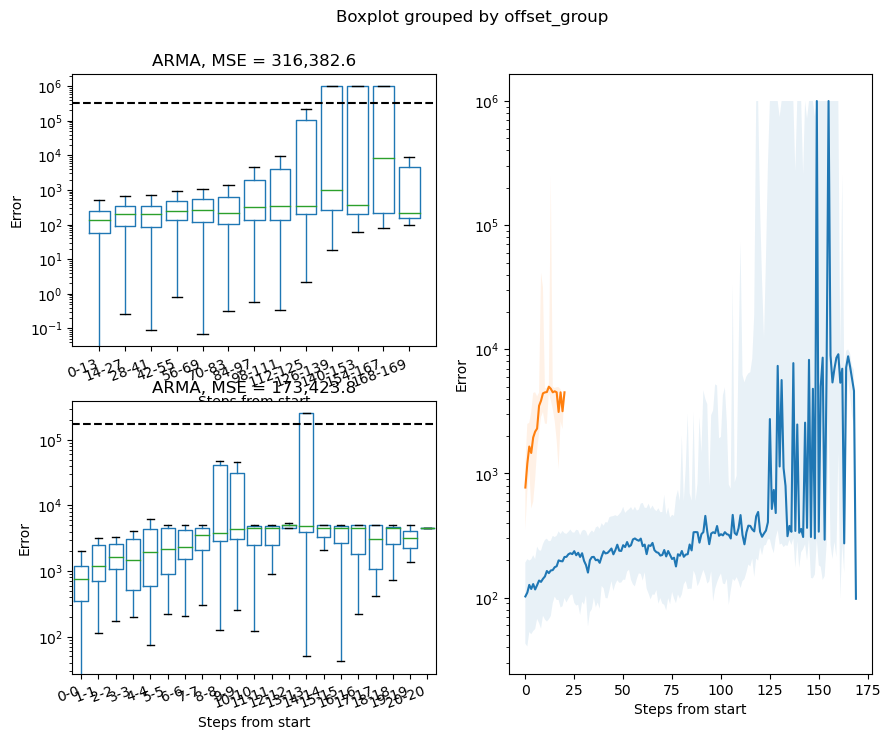

In [448]:
fig, ax = plt.subplots(2)

#r_fig, resid_ax = plt.subplots(2, figsize=(10, 8))
r_fig, resid_ax = plt.subplot_mosaic([[0, 2], [1, 2]], figsize=(10, 8))

read_and_plot(f'ARMA std price.csv', ax[0], resid_ax[0], resid_ax[2], label="ARMA")

read_and_plot("ARMA annual.csv", ax[1], resid_ax[1], resid_ax[2], label="ARMA")

In [430]:
ann = pd.read_csv("ARMA annual.csv")

(651, 4)


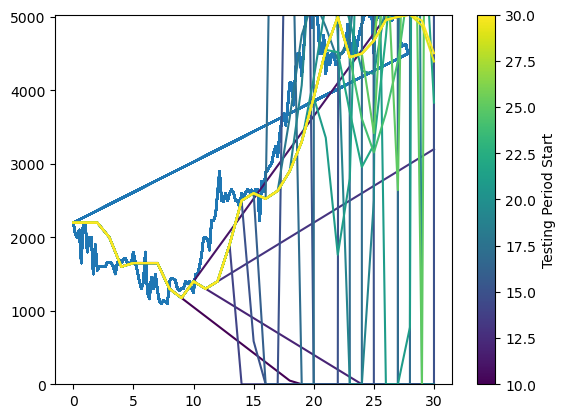

In [443]:
fig, ax = plt.subplots()

plt.plot(df.index/6, df.Observed)
read_and_plot("ARMA annual.csv", ax, label="ARMA")

In [462]:
ann

Unnamed: 0        lower        upper        value  start
0             0     0.000000     0.000000  2200.000000     10
1             1     0.000000     0.000000  2200.000000     10
2             2     0.000000     0.000000  2200.000000     10
3             3     0.000000     0.000000  2000.000000     10
4             4     0.000000     0.000000  1600.000000     10
..          ...          ...          ...          ...    ...
646          26     0.000000     0.000000  4957.910000     30
647          27     0.000000     0.000000  5000.000000     30
648          28     0.000000     0.000000  5030.000000     30
649          29     0.000000     0.000000  4950.000000     30
650          30  3973.019767  5037.163508  4505.091637     30

[651 rows x 5 columns]

In [452]:
ann_resampled

Unnamed: 0        lower        upper        value  start  period
0             0     0.000000     0.000000  2200.000000     60       0
1             1     0.000000     0.000000  2200.000000     60       6
2             2     0.000000     0.000000  2200.000000     60      12
3             3     0.000000     0.000000  2000.000000     60      18
4             4     0.000000     0.000000  1600.000000     60      24
..          ...          ...          ...          ...    ...     ...
646          26     0.000000     0.000000  4957.910000    180    3876
647          27     0.000000     0.000000  5000.000000    180    3882
648          28     0.000000     0.000000  5030.000000    180    3888
649          29     0.000000     0.000000  4950.000000    180    3894
650          30  3973.019767  5037.163508  4505.091637    180    3900

[651 rows x 6 columns]

In [455]:
ann_resampled

Unnamed: 0        lower        upper        value  start  period
0             0     0.000000     0.000000  2200.000000     60       0
1             1     0.000000     0.000000  2200.000000     60       6
2             2     0.000000     0.000000  2200.000000     60      12
3             3     0.000000     0.000000  2000.000000     60      18
4             4     0.000000     0.000000  1600.000000     60      24
..          ...          ...          ...          ...    ...     ...
646          26     0.000000     0.000000  4957.910000    180    3876
647          27     0.000000     0.000000  5000.000000    180    3882
648          28     0.000000     0.000000  5030.000000    180    3888
649          29     0.000000     0.000000  4950.000000    180    3894
650          30  3973.019767  5037.163508  4505.091637    180    3900

[651 rows x 6 columns]

In [458]:
ann_resampled = ann.assign(period = ann.index*6, start = ann.start*6)
ann_resampled_merge = pd.merge(ann_resampled, df, on=["start", "period"], how="outer", suffixes=(None, "y"))[ann_resampled.columns]
ann_resampled = ann_resampled_merge[np.in1d(ann_resampled_merge.start, ann_resampled.start)]

In [432]:
std_arm = pd.read_csv("ARMA std price.csv")
std_arm

Unnamed: 0       lower       upper       value  start
0               0    0.000000    0.000000    0.000000     10
1               1    0.000000    0.000000  450.121196     10
2               2    0.000000    0.000000  147.501284     10
3               3    0.000000    0.000000  136.332593     10
4               4    0.000000    0.000000  185.040522     10
...           ...         ...         ...         ...    ...
30595         175    0.000000    0.000000  204.991289    179
30596         176    0.000000    0.000000  167.257287    179
30597         177    0.000000    0.000000   85.805012    179
30598         178    0.000000    0.000000  219.317122    179
30599         179 -133.568268  329.309717   97.870724    179

[30600 rows x 5 columns]

In [464]:
ann_resampled

Unnamed: 0        lower        upper        value  start  period
8400          0.0     0.000000     0.000000  2200.000000     60       0
8401          NaN          NaN          NaN          NaN     60       1
8402          NaN          NaN          NaN          NaN     60       2
8403          NaN          NaN          NaN          NaN     60       3
8404          NaN          NaN          NaN          NaN     60       4
...           ...          ...          ...          ...    ...     ...
27162        26.0     0.000000     0.000000  4957.910000    180    3876
27163        27.0     0.000000     0.000000  5000.000000    180    3882
27164        28.0     0.000000     0.000000  5030.000000    180    3888
27165        29.0     0.000000     0.000000  4950.000000    180    3894
27166        30.0  3973.019767  5037.163508  4505.091637    180    3900

[3647 rows x 6 columns]

In [467]:
for start in ann_resampled.start.unique():
    ann_resampled[ann_resampled.start==start, :]

InvalidIndexError: (8400      True
8401      True
8402      True
8403      True
8404      True
         ...  
27162    False
27163    False
27164    False
27165    False
27166    False
Name: start, Length: 3647, dtype: bool, slice(None, None, None))

In [466]:
ann_resampled.interpolate(method='linear')

Unnamed: 0        lower        upper        value  start  period
8400     0.000000     0.000000     0.000000  2200.000000     60       0
8401     0.166667     0.000000     0.000000  2200.000000     60       1
8402     0.333333     0.000000     0.000000  2200.000000     60       2
8403     0.500000     0.000000     0.000000  2200.000000     60       3
8404     0.666667     0.000000     0.000000  2200.000000     60       4
...           ...          ...          ...          ...    ...     ...
27162   26.000000     0.000000     0.000000  4957.910000    180    3876
27163   27.000000     0.000000     0.000000  5000.000000    180    3882
27164   28.000000     0.000000     0.000000  5030.000000    180    3888
27165   29.000000     0.000000     0.000000  4950.000000    180    3894
27166   30.000000  3973.019767  5037.163508  4505.091637    180    3900

[3647 rows x 6 columns]

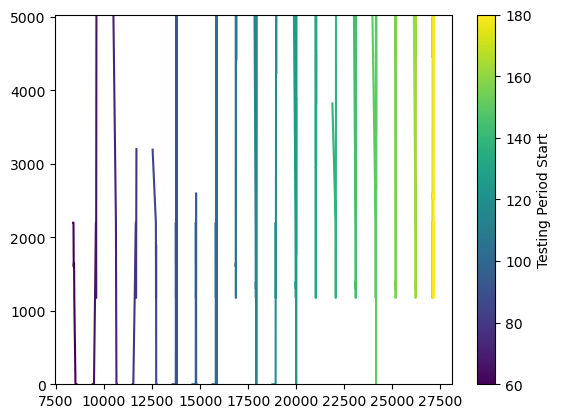

In [465]:
fig, ax = plt.subplots()
plot_dataset(ann_resampled.interpolate(), ax)